In [1]:
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
import os 
import seaborn as sns
import math

In [2]:
df_train = pd.read_csv('Titanic_train.csv')
df_train.head()
df_test = pd.read_csv('Titanic_test.csv')

## Fare標準化

In [3]:
from sklearn import preprocessing as prpro
ss = prpro.StandardScaler()
df_std = pd.DataFrame(ss.fit_transform(df_train[['Fare']]))
df_train['Fare'] = df_std

df_std1 = pd.DataFrame(ss.fit_transform(df_test[['Fare']]))
df_test['Fare'] = df_std1

# 基本統計量

In [4]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,8.910000e+02
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,-4.373606e-17
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,1.000562e+00
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,-6.484217e-01
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,-4.891482e-01
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,-3.573909e-01
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,-2.424635e-02
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,9.667167e+00


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 相関係数 ・ヒートマップ

In [6]:
df_train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


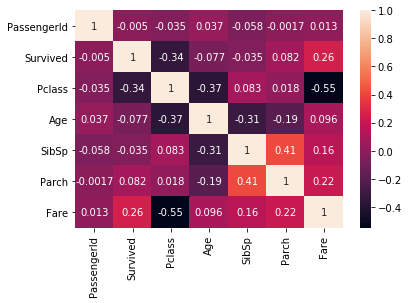

In [7]:
sns.heatmap(df_train.corr(), annot=True)

# 欠損値の合計

In [8]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Nameから敬称を抜き取った`Honorifics`列作成
（kaggleの他人のNotebook参照）

In [10]:
df_train['Honorifics'] = df_train['Name'].apply(lambda x: x.split(',')[1].split(' ')[1])
df_test['Honorifics'] = df_test['Name'].apply(lambda x: x.split(',')[1].split(' ')[1])

In [11]:
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Honorifics
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,-0.502445,NaN,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,0.786845,C85,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,-0.488854,NaN,S,Miss.


----

# それぞれの可視化

---

# train data

#### 男女（Survived分け）人数

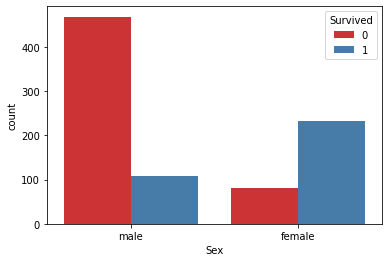

In [12]:
sns.countplot(x='Sex', hue='Survived', palette='Set1',data=df_train)

Survivedの平均は。。。

In [13]:
df_train['Survived'].mean()

0.3838383838383838

男性のみのSurvivedの平均は。。。

In [14]:
df_train['Survived'].loc[df_train['Sex']=='male'].mean()

0.18890814558058924

女性のみのSUrvivedの平均は。。。

In [15]:
df_train['Survived'].loc[df_train['Sex']=='female'].mean()

0.7420382165605095

## 男性はたくさん死んでいて、女性はたくさん生き延びた

---

### Ageのヒストグラム

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([14., 10.,  6., 10.,  4.,  3.,  3.,  4.,  8.,  2.,  4.,  1.,  2.,
         6.,  6., 17., 13., 26., 25., 15., 25., 27., 15., 31., 24., 18.,
        18., 25., 22., 25., 19., 18., 17., 15., 19., 22.,  7., 11., 14.,
        13.,  8., 13.,  5.,  9., 12.,  5.,  9.,  9.,  6., 10.,  7.,  6.,
         1.,  8.,  2.,  5.,  2.,  5.,  2.,  4.,  3.,  4.,  2.,  2.,  3.,
         1.,  0.,  0.,  0.,  2.,  3.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  1.]),
 array([ 0.42   ,  1.41475,  2.4095 ,  3.40425,  4.399  ,  5.39375,
         6.3885 ,  7.38325,  8.378  ,  9.37275, 10.3675 , 11.36225,
        12.357  , 13.35175, 14.3465 , 15.34125, 16.336  , 17.33075,
        18.3255 , 19.32025, 20.315  , 21.30975, 22.3045 , 23.29925,
        24.294  , 25.28875, 26.2835 , 27.27825, 28.273  , 29.26775,
        30.2625 , 31.25725, 32.252  , 33.24675, 34.2415 , 35.23625,
        36.231  , 37.22575, 38.2205 , 39.21525, 40.21   , 41.20475,
        42.1995 , 43.19425, 44.189  , 45.18375, 46.1785 , 47.17325

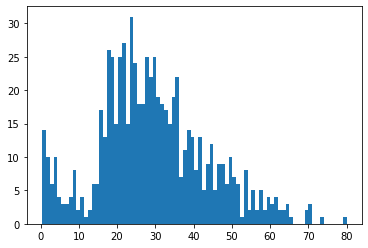

In [16]:
plt.hist(df_train['Age'], bins=80)

・12歳くらいまで非常に少ない

・そこから急激に大きくなり、22歳くらいをピークにだんだんと下がる

## Survived別でAgeの積み上げヒストグラム書いてみた

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


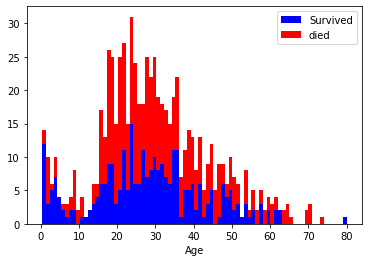

In [17]:
age_1 = df_train['Age'].loc[df_train['Survived']==1]
age_0 = df_train['Age'].loc[df_train['Survived']==0]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.hist([age_1, age_0], bins=80, color=['blue', 'red'], label=['Survived', 'died'], histtype='bar', stacked=True)
ax.set_xlabel('Age')
ax.legend()
fig.show()

・子供の生存率高い（特に18歳くらいまで）

## 性別別Age積み上げヒストグラム書いてみた

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


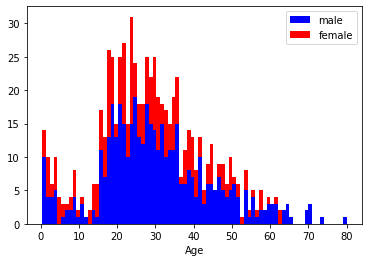

In [18]:
age_m = df_train['Age'].loc[df_train['Sex']=='male']
age_f = df_train['Age'].loc[df_train['Sex']=='female']

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.hist([age_m, age_f], bins=80, color=['blue', 'red'], label=['male', 'female'], histtype='bar', stacked=True)
ax.set_xlabel('Age')
ax.legend()
fig.show()

### 65歳以降は男性のみ!?

### Pclass別も見てみよう

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


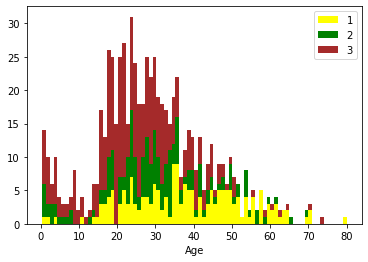

In [19]:
Pclass1 = df_train['Age'].loc[df_train['Pclass']==1]
Pclass2 = df_train['Age'].loc[df_train['Pclass']==2]
Pclass3 = df_train['Age'].loc[df_train['Pclass']==3]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.hist([Pclass1, Pclass2, Pclass3], bins=80, color=['yellow', 'green', 'brown'], label=['1', '2', '3'], histtype='bar', stacked=True)
ax.set_xlabel('Age')
ax.legend()
fig.show()

## Pclassが高くなるにつれて若くなる？

(array([1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 3., 3.,
        4., 5., 0., 3., 5., 3., 7., 3., 2., 4., 4., 3., 6., 5., 2., 4., 1.,
        9., 9., 3., 6., 5., 5., 1., 4., 1., 3., 5., 3., 5., 5., 5., 5., 3.,
        4., 1., 4., 1., 4., 0., 5., 0., 3., 2., 3., 1., 2., 2., 0., 0., 0.,
        0., 1., 2., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([ 0.92  ,  1.9085,  2.897 ,  3.8855,  4.874 ,  5.8625,  6.851 ,
         7.8395,  8.828 ,  9.8165, 10.805 , 11.7935, 12.782 , 13.7705,
        14.759 , 15.7475, 16.736 , 17.7245, 18.713 , 19.7015, 20.69  ,
        21.6785, 22.667 , 23.6555, 24.644 , 25.6325, 26.621 , 27.6095,
        28.598 , 29.5865, 30.575 , 31.5635, 32.552 , 33.5405, 34.529 ,
        35.5175, 36.506 , 37.4945, 38.483 , 39.4715, 40.46  , 41.4485,
        42.437 , 43.4255, 44.414 , 45.4025, 46.391 , 47.3795, 48.368 ,
        49.3565, 50.345 , 51.3335, 52.322 , 53.3105, 54.299 , 55.2875,
        56.276 , 57.2645, 58.253 , 59.2415, 60.23  , 61.2185, 62.207 ,

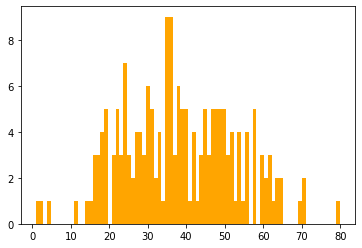

In [20]:
plt.hist(df_train['Age'].loc[df_train['Pclass']==1], color='orange', bins=80)

(array([ 5.,  2.,  3.,  2.,  1.,  0.,  1.,  1.,  2.,  0.,  0.,  0.,  0.,
         0.,  1.,  1.,  0.,  2.,  2.,  6.,  0.,  6.,  0.,  4.,  2.,  7.,
        10.,  0.,  7.,  2.,  6.,  9.,  6.,  8.,  5.,  0.,  6.,  3., 10.,
         3.,  7.,  2.,  0.,  1.,  3.,  3.,  1.,  5.,  1.,  2.,  0.,  2.,
         1.,  1.,  2.,  0.,  4.,  0.,  1.,  2.,  0.,  4.,  1.,  0.,  2.,
         0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  1.]),
 array([ 0.67    ,  1.536625,  2.40325 ,  3.269875,  4.1365  ,  5.003125,
         5.86975 ,  6.736375,  7.603   ,  8.469625,  9.33625 , 10.202875,
        11.0695  , 11.936125, 12.80275 , 13.669375, 14.536   , 15.402625,
        16.26925 , 17.135875, 18.0025  , 18.869125, 19.73575 , 20.602375,
        21.469   , 22.335625, 23.20225 , 24.068875, 24.9355  , 25.802125,
        26.66875 , 27.535375, 28.402   , 29.268625, 30.13525 , 31.001875,
        31.8685  , 32.735125, 33.60175 , 34.468375, 35.335   , 36.201625,
        37.06825 , 37.93

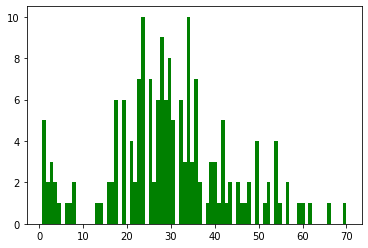

In [21]:
plt.hist(df_train['Age'].loc[df_train['Pclass']==2], color='green', bins=80)

(array([ 8.,  7.,  3.,  7.,  3.,  0.,  2.,  2.,  2.,  8.,  2.,  3.,  1.,
         1.,  4.,  5., 12.,  0.,  8., 16., 14., 16., 17., 20.,  5., 14.,
        14., 14.,  8., 12.,  2., 11., 13.,  7., 12.,  8.,  4.,  7.,  6.,
         2.,  4.,  6.,  0.,  7.,  4.,  4.,  3.,  4.,  5.,  1.,  3.,  2.,
         1.,  1.,  3.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,
         1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  1.]),
 array([ 0.42   ,  1.33975,  2.2595 ,  3.17925,  4.099  ,  5.01875,
         5.9385 ,  6.85825,  7.778  ,  8.69775,  9.6175 , 10.53725,
        11.457  , 12.37675, 13.2965 , 14.21625, 15.136  , 16.05575,
        16.9755 , 17.89525, 18.815  , 19.73475, 20.6545 , 21.57425,
        22.494  , 23.41375, 24.3335 , 25.25325, 26.173  , 27.09275,
        28.0125 , 28.93225, 29.852  , 30.77175, 31.6915 , 32.61125,
        33.531  , 34.45075, 35.3705 , 36.29025, 37.21   , 38.12975,
        39.0495 , 39.96925, 40.889  , 41.80875, 42.7285 , 43.64825

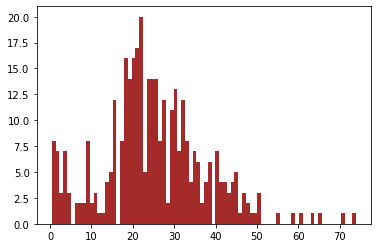

In [22]:
plt.hist(df_train['Age'].loc[df_train['Pclass']==3], color='brown', bins=80)

---

### Pclass（性別分け）人数

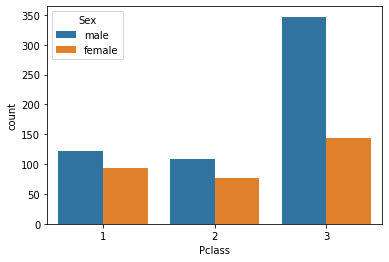

In [23]:
sns.countplot(x='Pclass', hue='Sex', data=df_train)

### Pclass（生死分け）人数

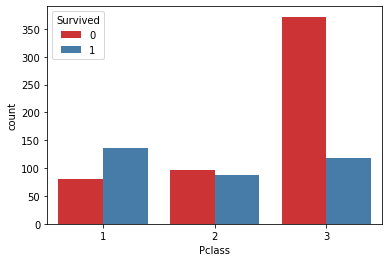

In [24]:
sns.countplot(x='Pclass', hue='Survived', palette='Set1', data=df_train)

In [25]:
df_train['Survived'].mean()

0.3838383838383838

In [26]:
df_train['Survived'].loc[df_train['Pclass']==1].mean()

0.6296296296296297

In [27]:
df_train['Survived'].loc[df_train['Pclass']==2].mean()

0.47282608695652173

In [28]:
df_train['Survived'].loc[df_train['Pclass']==3].mean()

0.24236252545824846

## Pclassが高くなるにつれて生き延びた人が少なくなっている

---

# Fareについて見てみよう

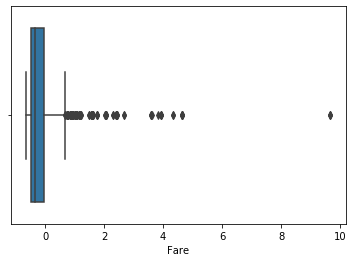

In [29]:
sns.boxplot(df_train['Fare'])

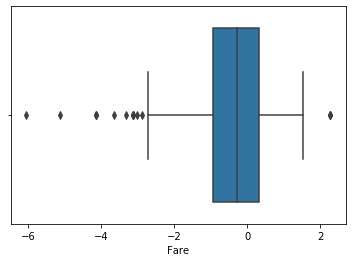

In [30]:
sns.boxplot(df_train['Fare'].apply(np.log))

(array([ 17., 320., 129.,  53.,  43., 104.,  31.,  19.,   4.,  12.,  23.,
         16.,   6.,  12.,  10.,  19.,  10.,   8.,   2.,   0.,   2.,   6.,
          3.,   4.,   0.,   0.,   7.,   0.,   2.,   7.,   0.,   0.,   2.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   4.,   0.,   1.,
          4.,   0.,   0.,   0.,   2.,   0.,   0.,   6.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          3.]),
 array([-0.64842165, -0.54526577, -0.44210989, -0.33895401, -0.23579813,
        -0.13264224, -0.02948636,  0.07366952,  0.1768254 ,  0.27998128,
         0.38313716,  0.48629305,  0.58944893,  0.69260481,  0.79576069,
         0.89891657,  1.00207246,  1.10522834,  1.20838422,  1.3115401 ,
         1.41469598,  1.51

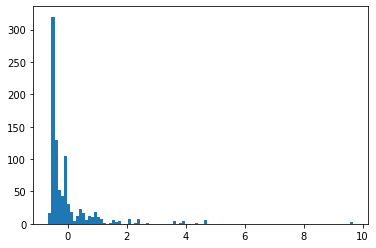

In [31]:
plt.hist(df_train['Fare'], bins=100)

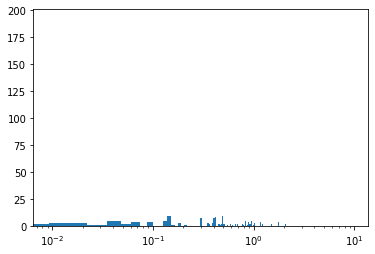

In [32]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.hist(df_train['Fare'], bins=800)
ax.set_xscale('log')

## Pclass別Fareヒストグラム 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


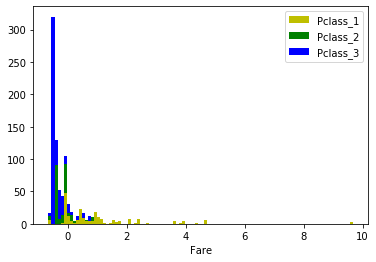

In [33]:
Fare_1 = df_train['Fare'].loc[df_train['Pclass']==1]
Fare_2 = df_train['Fare'].loc[df_train['Pclass']==2]
Fare_3 = df_train['Fare'].loc[df_train['Pclass']==3]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.hist([Fare_1, Fare_2, Fare_3], color=['y', 'g', 'b'], label=['Pclass_1', 'Pclass_2', 'Pclass_3'], histtype='bar', stacked=True, bins=100)
ax.set_xlabel('Fare')
ax.legend()
fig.show()

In [34]:
df_train['Fare'].loc[df_train['Pclass']==1].mean()

1.0460066545582427

In [35]:
df_train['Fare'].loc[df_train['Pclass']==2].mean()

-0.232395059178009

In [36]:
df_train['Fare'].loc[df_train['Pclass']==3].mean()

-0.3730687301340669

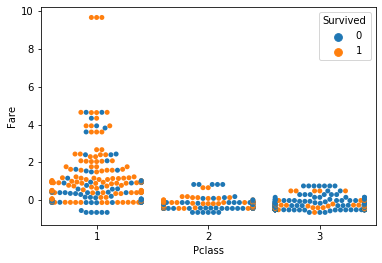

In [37]:
sns.swarmplot(x='Pclass', y='Fare', hue='Survived', data=df_train)

## とりあえずPclass=1が一番高級、３が一番安い

---

## Survived別Fareヒストグラム

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


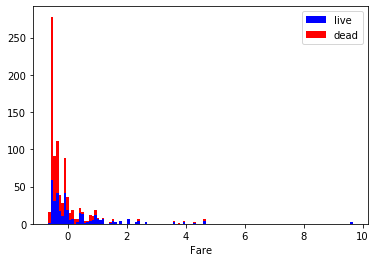

In [38]:
Survived_1 = df_train['Fare'].loc[df_train['Survived']==1]
Survived_0 = df_train['Fare'].loc[df_train['Survived']==0]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.hist([Survived_1, Survived_0], bins=120, color=['blue', 'red'], label=['live', 'dead'], histtype='bar', stacked=True)
ax.set_xlabel('Fare')
ax.legend()
fig.show()

#### 特にわかることなさそう

## Embarked を見てみよう

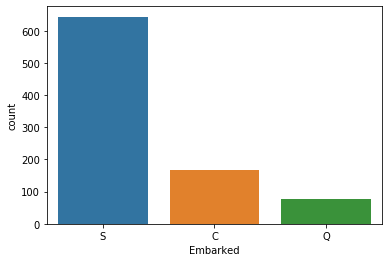

In [39]:
sns.countplot(df_train['Embarked'])

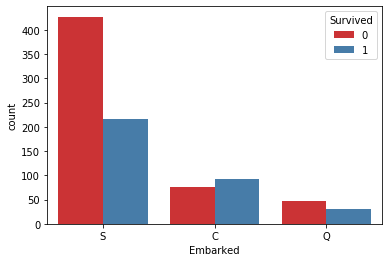

In [40]:
sns.countplot(x='Embarked', hue='Survived', palette='Set1', data=df_train)

## Embarked=Sの人は多く死んでいて、Cの人は多く生きている

In [41]:
df_train['Survived'].loc[df_train['Embarked']=='S'].mean()

0.33695652173913043

In [42]:
df_train['Survived'].loc[df_train['Embarked']=='C'].mean()

0.5535714285714286

In [43]:
df_train['Survived'].loc[df_train['Embarked']=='Q'].mean()

0.38961038961038963

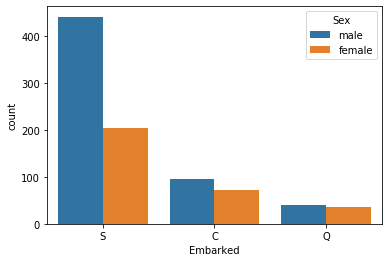

In [44]:
sns.countplot(x='Embarked', hue='Sex', data=df_train)

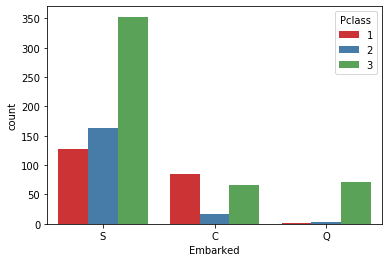

In [45]:
sns.countplot(x='Embarked', hue='Pclass', palette='Set1', data=df_train)

In [46]:
df_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Honorifics
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,-0.502445,NaN,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,0.786845,C85,C,Mrs.


---

# SibSpとParchを見てみる

In [47]:
df_train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [48]:
df_train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

### SibSpとParchのヒストグラムを見てみる

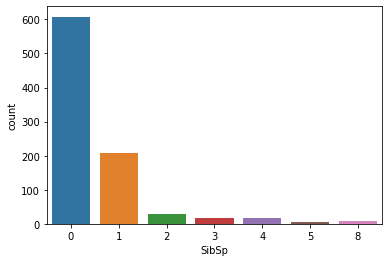

In [49]:
sns.countplot(df_train['SibSp'])

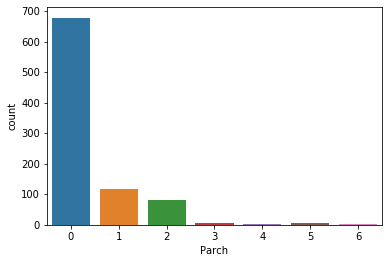

In [50]:
sns.countplot(df_train['Parch'])

#### SibSpもParchも同じような分布!

## Survived別のヒストグラム

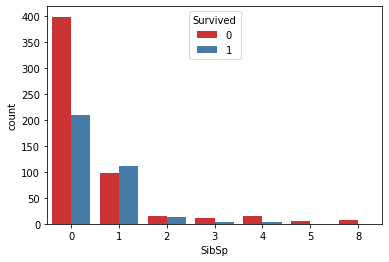

In [51]:
sns.countplot(x='SibSp', hue='Survived', data=df_train, palette='Set1')

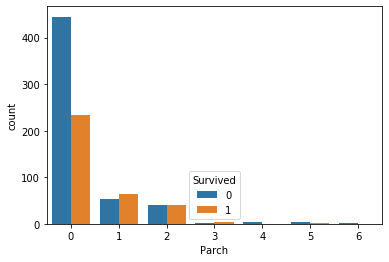

In [52]:
sns.countplot(x='Parch', hue='Survived', data=df_train)

### 大体同じ分布！
### 特に一人で来ている人は死んでいる確率高い！！！

---

## SibSpとParchの合計（身内で何人で来ているか）のRelationを作成

In [53]:
df_train1 = df_train.assign(Relation = df_train['Parch'] + df_train['SibSp'])
df_test1 = df_test.assign(Relation = df_test['Parch'] + df_test['SibSp'])

In [54]:
df_train1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Honorifics,Relation
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,-0.502445,NaN,S,Mr.,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,0.786845,C85,C,Mrs.,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,-0.488854,NaN,S,Miss.,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,0.420730,C123,S,Mrs.,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,-0.486337,NaN,S,Mr.,0


0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Relation, dtype: int64


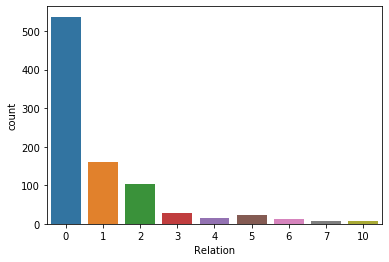

In [55]:
print(df_train1['Relation'].value_counts())
sns.countplot(df_train1['Relation'])

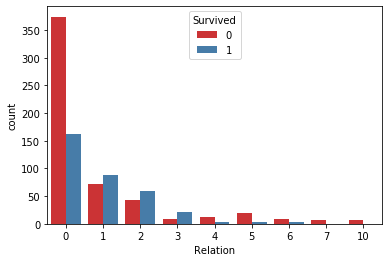

In [56]:
sns.countplot(x='Relation', hue='Survived', data=df_train1, palette='Set1')

## 同伴無しで来ている人と、4人以上同伴で乗船している人はめっちゃ死んでる。
## 同伴1~3人の人は生きている確率高い

In [57]:
for number in range(int(11)):
    means = df_train1['Survived'].loc[df_train1['Relation'] == number].mean()
    print(means)

0.30353817504655495
0.5527950310559007
0.5784313725490197
0.7241379310344828
0.2
0.13636363636363635
0.3333333333333333
0.0
nan
nan
0.0


## Relation と Sex

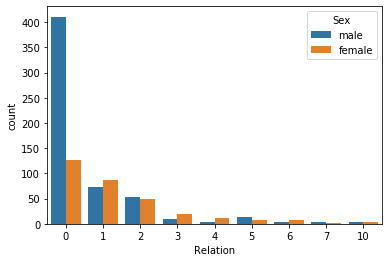

In [58]:
sns.countplot(x='Relation', hue='Sex', data=df_train1)

## 1人で来ている男性が多い

## Relation と Pclass

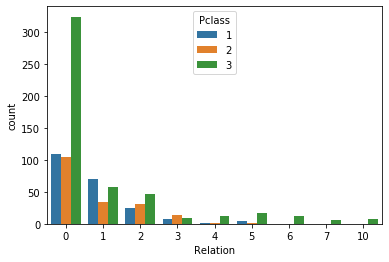

In [59]:
sns.countplot(x='Relation', hue='Pclass', data=df_train1)

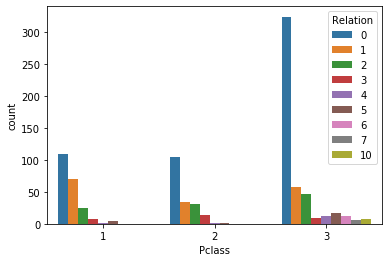

In [60]:
sns.countplot(x='Pclass', hue='Relation', data=df_train1)

### Pclass=3の1人で来ている人が多い

## Relation=0の人と、4以上の人を括ってみる、

In [61]:
df_train1.loc[df_train1['Relation']==0, 'alone'] = 1
df_train1.loc[df_train1['Relation']!=0, 'alone'] = 0

In [62]:
df_train1.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Honorifics,Relation,alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,-0.502445,NaN,S,Mr.,1,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,0.786845,C85,C,Mrs.,1,0.0


In [63]:
df_train1['alone']=df_train1['alone'].astype(int)

In [64]:
df_train1.loc[df_train1['Relation']>=4, 'r_many'] = 1
df_train1.loc[df_train1['Relation']<=3, 'r_many'] = 0

In [65]:
df_train1['r_many']=df_train1['r_many'].astype(int)

In [66]:
df_train1.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Honorifics,Relation,alone,r_many
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,-0.502445,NaN,S,Mr.,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,0.786845,C85,C,Mrs.,1,0,0


# ここで作った特徴量はいずれ更新されることになる

## 1人で来ている人だけのdf作成

In [67]:
df_train_alone = df_train1.loc[df_train1['Relation']==0]

In [68]:
df_train_alone.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Honorifics,Relation,alone,r_many
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,-0.488854,NaN,S,Miss.,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,-0.486337,NaN,S,Mr.,0,1,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,-0.478116,NaN,Q,Mr.,0,1,0


In [69]:
df_train_alone.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537 entries, 2 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  537 non-null    int64  
 1   Survived     537 non-null    int64  
 2   Pclass       537 non-null    int64  
 3   Name         537 non-null    object 
 4   Sex          537 non-null    object 
 5   Age          404 non-null    float64
 6   SibSp        537 non-null    int64  
 7   Parch        537 non-null    int64  
 8   Ticket       537 non-null    object 
 9   Fare         537 non-null    float64
 10  Cabin        94 non-null     object 
 11  Embarked     535 non-null    object 
 12  Honorifics   537 non-null    object 
 13  Relation     537 non-null    int64  
 14  alone        537 non-null    int64  
 15  r_many       537 non-null    int64  
dtypes: float64(2), int64(8), object(6)
memory usage: 71.3+ KB


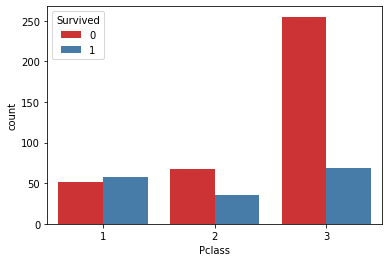

In [70]:
sns.countplot(x='Pclass', hue='Survived', palette='Set1', data=df_train_alone)

## AloneではPclass=3の人が多く死んでいるように見えるが、これはaloneじゃなくても同じ

## 同伴4人以上で来ている人を見てみる

In [71]:
df_train_many = df_train1.loc[df_train1['Relation']>=4]

In [72]:
df_train_many.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Honorifics,Relation,alone,r_many
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,-0.224083,NaN,S,Master.,4,0,1
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,-0.018709,NaN,S,Mr.,6,0,1


In [73]:
df_train_many.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 7 to 885
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  62 non-null     int64  
 1   Survived     62 non-null     int64  
 2   Pclass       62 non-null     int64  
 3   Name         62 non-null     object 
 4   Sex          62 non-null     object 
 5   Age          51 non-null     float64
 6   SibSp        62 non-null     int64  
 7   Parch        62 non-null     int64  
 8   Ticket       62 non-null     object 
 9   Fare         62 non-null     float64
 10  Cabin        6 non-null      object 
 11  Embarked     62 non-null     object 
 12  Honorifics   62 non-null     object 
 13  Relation     62 non-null     int64  
 14  alone        62 non-null     int64  
 15  r_many       62 non-null     int64  
dtypes: float64(2), int64(8), object(6)
memory usage: 8.2+ KB


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([7., 2., 3., 1., 1., 2., 2., 5., 1., 2., 0., 0., 2., 0., 3., 1., 1.,
        1., 0., 2., 1., 2., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 3., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([ 1.  ,  2.05,  3.1 ,  4.15,  5.2 ,  6.25,  7.3 ,  8.35,  9.4 ,
        10.45, 11.5 , 12.55, 13.6 , 14.65, 15.7 , 16.75, 17.8 , 18.85,
        19.9 , 20.95, 22.  , 23.05, 24.1 , 25.15, 26.2 , 27.25, 28.3 ,
        29.35, 30.4 , 31.45, 32.5 , 33.55, 34.6 , 35.65, 36.7 , 37.75,
        38.8 , 39.85, 40.9 , 41.95, 43.  , 44.05, 45.1 , 46.15, 47.2 ,
        48.25, 49.3 , 50.35, 51.4 , 52.45, 53.5 , 54.55, 55.6 , 56.65,
        57.7 , 58.75, 59.8 , 60.85, 61.9 , 62.95, 64.  ]),
 <a list of 60 Patch objects>)

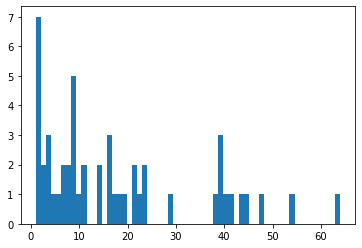

In [74]:
plt.hist(df_train_many['Age'], bins=60)

## 子供は同伴多め（当たり前）

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


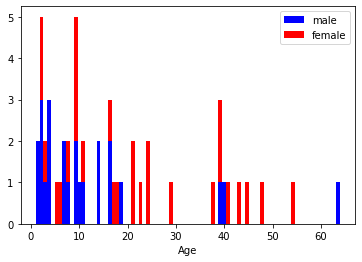

In [75]:
age_m = df_train_many['Age'].loc[df_train['Sex']=='male']
age_f = df_train_many['Age'].loc[df_train['Sex']=='female']

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.hist([age_m, age_f], bins=80, color=['blue', 'red'], label=['male', 'female'], histtype='bar', stacked=True)
ax.set_xlabel('Age')
ax.legend()
fig.show()

In [76]:
df_train_many['Survived'].mean()

0.16129032258064516

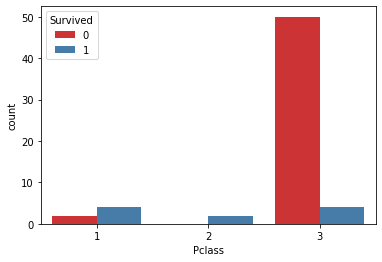

In [77]:
sns.countplot(x='Pclass', hue='Survived', palette='Set1', data=df_train_many)

In [78]:
df_train['Survived'].loc[df_train['Pclass']==3].mean()

0.24236252545824846

In [79]:
df_train_many['Survived'].loc[df_train['Pclass']==3].mean()

0.07407407407407407

## Relation_manyでは、Pclass=3の人たちが多く死んでいる
## 対して、Pclass=1,2では生存率高いように見えるがデータが少ないのでそんなこと言えない

# ticketを見ていこう

In [80]:
df_train['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [81]:
df_train['Ticket'].value_counts()

1601          7
CA. 2343      7
347082        7
3101295       6
347088        6
             ..
F.C. 12750    1
349242        1
PC 17474      1
C 17369       1
3101298       1
Name: Ticket, Length: 681, dtype: int64

In [82]:
df_train.loc[df_train['Ticket']=='347082']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Honorifics
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,-0.018709,NaN,S,Mr.
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,-0.018709,NaN,S,Miss.
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,-0.018709,NaN,S,Miss.
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,-0.018709,NaN,S,Miss.
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,-0.018709,NaN,S,Mrs.
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,-0.018709,NaN,S,Miss.
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,-0.018709,NaN,S,Master.


In [83]:
df_train.loc[df_train['Ticket']=='CA. 2343']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Honorifics
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,0.751946,NaN,S,Master.
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,0.751946,NaN,S,Miss.
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,0.751946,NaN,S,Mr.
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,0.751946,NaN,S,Mr.
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,0.751946,NaN,S,Miss.
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,0.751946,NaN,S,Mr.
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,0.751946,NaN,S,Miss.


In [84]:
df_train.loc[df_train['Ticket']=='CA 2144']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Honorifics
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,0.295895,NaN,S,Master.
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,0.295895,NaN,S,Miss.
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,0.295895,NaN,S,Master.
480,481,0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,0.295895,NaN,S,Master.
678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,0.295895,NaN,S,Mrs.
683,684,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,0.295895,NaN,S,Mr.


## 同じチケットは同伴の人たち

In [85]:
#とりあえず最初の3文字だけ抽出してみる
Ticket_del1 = df_train['Ticket'].str[:3]

In [86]:
Ticket_del1.unique()

array(['A/5', 'PC ', 'STO', '113', '373', '330', '174', '349', '347',
       '237', 'PP ', '350', '248', '382', '244', '345', '264', '239',
       '263', '199', '335', 'C.A', '267', 'A./', '265', '754', '116',
       'SC/', 'S.C', '370', '143', '266', '310', 'A/4', '292', '269',
       'CA ', '369', 'S.P', '315', 'S.O', '268', '160', '348', '374',
       '364', 'SO/', 'W./', 'SOT', '343', 'W.E', '231', '352', '312',
       '371', '110', '324', '413', '262', 'A4.', '272', 'C 1', '228',
       '117', '753', '365', '230', 'A.5', 'Fa ', '358', 'CA.', '363',
       '111', '177', '250', 'LIN', '234', '284', '368', '457', '367',
       '112', 'F.C', '243', '118', 'W/C', '220', '214', 'SW/', '236',
       '286', 'SCO', '362', '384', '135', '336', '198', '119', '923',
       '226', 'P/P', '290', '169', '285', '759', '229', '314', '386',
       '726', 'C 7', '323', '278', 'SC ', '240', '341', '291', '394',
       '282', '200', '376', '653', 'A/S', '755', '346', 'C 4', '127',
       '270', 'WE/',

In [87]:
Ticket_del1.value_counts()

PC     60
349    53
347    48
113    47
C.A    28
       ..
726     1
240     1
S.P     1
222     1
214     1
Name: Ticket, Length: 154, dtype: int64

In [88]:
df_train_PC = df_train.loc[df_train['Ticket'].str[:2]=='PC']

In [89]:
df_train_PC.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Honorifics
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,0.786845,C85,C,Mrs.
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,-0.090272,NaN,C,Don.
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,2.301729,B78,C,Mrs.
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,1.006062,NaN,C,Mr.
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,0.896497,D33,C,Mrs.


In [90]:
df_train_PC['Survived'].mean()

0.65

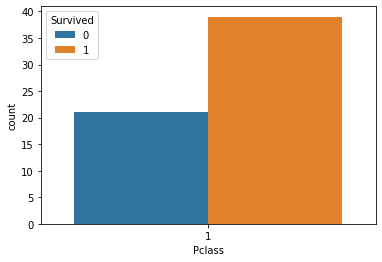

In [91]:
sns.countplot(x='Pclass', hue="Survived", data=df_train_PC)

## Ticketの頭文字PCの人はみんなPclass1

In [92]:
df_train_PC['Ticket'].value_counts()

PC 17757    4
PC 17755    3
PC 17760    3
PC 17572    3
PC 17582    3
PC 17761    2
PC 17593    2
PC 17604    2
PC 17485    2
PC 17558    2
PC 17611    2
PC 17569    2
PC 17758    2
PC 17477    2
PC 17608    2
PC 17599    1
PC 17609    1
PC 17585    1
PC 17592    1
PC 17475    1
PC 17483    1
PC 17754    1
PC 17474    1
PC 17596    1
PC 17605    1
PC 17601    1
PC 17590    1
PC 17759    1
PC 17597    1
PC 17756    1
PC 17600    1
PC 17473    1
PC 17612    1
PC 17603    1
PC 17595    1
PC 17318    1
PC 17610    1
PC 17482    1
PC 17476    1
Name: Ticket, dtype: int64

In [93]:
df_train_349 = df_train.loc[df_train['Ticket'].str[:3]=='349']

In [94]:
df_train_349.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Honorifics
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,-0.224083,NaN,S,Master.
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,-0.224083,NaN,S,Miss.
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,-0.489442,NaN,S,Mr.
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,-0.489442,NaN,C,Mr.
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.0,1,0,349237,-0.290024,NaN,S,Mrs.


In [95]:
df_train_349['Survived'].mean()

0.05660377358490566

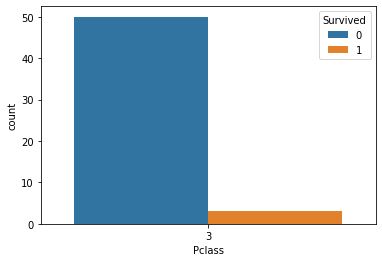

In [96]:
sns.countplot(x='Pclass', hue='Survived', data=df_train_349)

## 349から始まる人はみんなPclass3で、しかも異常に多く死んでいる

In [97]:
df_train_347 = df_train.loc[df_train['Ticket'].str[:3]=='347']
df_train_347.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Honorifics
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,-0.424256,NaN,S,Mrs.
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,-0.018709,NaN,S,Mr.
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,-0.016444,NaN,S,Mrs.
63,64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,-0.086664,NaN,S,Master.
91,92,0,3,"Andreasson, Mr. Paul Edvin",male,20.0,0,0,347466,-0.490280,NaN,S,Mr.


In [98]:
df_train_347['Survived'].mean()

0.22916666666666666

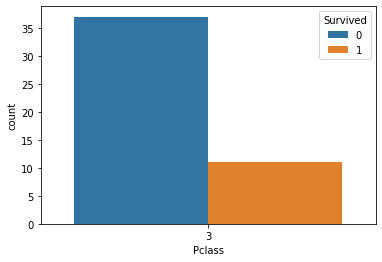

In [99]:
sns.countplot(x='Pclass', hue='Survived', data=df_train_347)

## 347から始まるチケットの人もみんなPclass3で、まあ3の平均くらい

In [100]:
df_train['Survived'].loc[df_train['Pclass']==3].mean()

0.24236252545824846

In [101]:
df_train_117 = df_train.loc[df_train['Ticket'].str[:3]=='117']
df_train_117.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Honorifics
136,137,1,1,"Newsom, Miss. Helen Monypeny",female,19.0,0,2,11752,-0.119216,D47,S,Miss.
248,249,1,1,"Beckwith, Mr. Richard Leonard",male,37.0,1,1,11751,0.409741,D35,S,Mr.
310,311,1,1,"Hays, Miss. Margaret Bechstein",female,24.0,0,0,11767,1.025945,C54,C,Miss.
370,371,1,1,"Harder, Mr. George Achilles",male,25.0,1,0,11765,0.467880,E50,C,Mr.
487,488,0,1,"Kent, Mr. Edward Austin",male,58.0,0,0,11771,-0.050421,B37,C,Mr.


In [102]:
df_train_117['Survived'].mean()

0.9090909090909091

In [103]:
df_train['Survived'].loc[df_train['Pclass']==1].mean()

0.6296296296296297

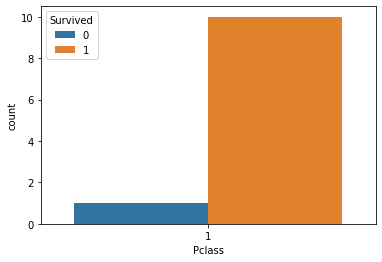

In [104]:
sns.countplot(x='Pclass', hue='Survived', data=df_train_117)

## 117の人はみんなPclass1で、しかもめっちゃ死んでいる

## Ticket[C.A]

In [105]:
df_train_CA = df_train.loc[df_train['Ticket'].str[:3]=='C.A']
df_train_CA.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Honorifics
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,-0.437007,NaN,S,Mr.
56,57,1,2,"Rugg, Miss. Emily",female,21.0,0,0,C.A. 31026,-0.437007,NaN,S,Miss.
58,59,1,2,"West, Miss. Constance Mirium",female,5.0,1,2,C.A. 34651,-0.089684,NaN,S,Miss.
66,67,1,2,"Nye, Mrs. (Elizabeth Ramell)",female,29.0,0,0,C.A. 29395,-0.437007,F33,S,Mrs.
70,71,0,2,"Jenkin, Mr. Stephen Curnow",male,32.0,0,0,C.A. 33111,-0.437007,NaN,S,Mr.


In [106]:
df_train_CA['Survived'].mean()

0.4642857142857143

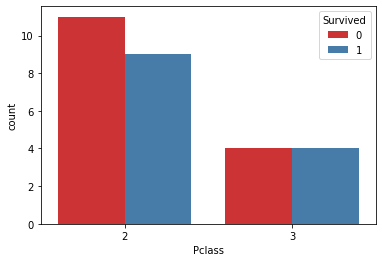

In [107]:
sns.countplot(x='Pclass', hue='Survived', palette='Set1', data=df_train_CA)

In [108]:
df_train_CA2 = df_train_CA.loc[df_train_CA['Pclass']==2]
df_train_CA2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Honorifics
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,-0.437007,NaN,S,Mr.
56,57,1,2,"Rugg, Miss. Emily",female,21.0,0,0,C.A. 31026,-0.437007,NaN,S,Miss.
58,59,1,2,"West, Miss. Constance Mirium",female,5.0,1,2,C.A. 34651,-0.089684,NaN,S,Miss.
66,67,1,2,"Nye, Mrs. (Elizabeth Ramell)",female,29.0,0,0,C.A. 29395,-0.437007,F33,S,Mrs.
70,71,0,2,"Jenkin, Mr. Stephen Curnow",male,32.0,0,0,C.A. 33111,-0.437007,NaN,S,Mr.
134,135,0,2,"Sobey, Mr. Samuel James Hayden",male,25.0,0,0,C.A. 29178,-0.386671,NaN,S,Mr.
145,146,0,2,"Nicholls, Mr. Joseph Charles",male,19.0,1,1,C.A. 33112,0.091528,NaN,S,Mr.
161,162,1,2,"Watt, Mrs. James (Elizabeth ""Bessie"" Inglis Mi...",female,40.0,0,0,C.A. 33595,-0.331300,NaN,S,Mrs.
234,235,0,2,"Leyson, Mr. Robert William Norman",male,24.0,0,0,C.A. 29566,-0.437007,NaN,S,Mr.
237,238,1,2,"Collyer, Miss. Marjorie ""Lottie""",female,8.0,0,2,C.A. 31921,-0.119886,NaN,S,Miss.


In [109]:
df_train_CA3 = df_train_CA.loc[df_train_CA['Pclass']==3]
df_train_CA3

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Honorifics
93,94,0,3,"Dean, Mr. Bertram Frank",male,26.0,1,2,C.A. 2315,-0.234150,NaN,S,Mr.
279,280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,-0.240694,NaN,S,Mrs.
348,349,1,3,"Coutts, Master. William Loch ""William""",male,3.0,1,1,C.A. 37671,-0.328280,NaN,S,Master.
489,490,1,3,"Coutts, Master. Eden Leslie ""Neville""",male,9.0,1,1,C.A. 37671,-0.328280,NaN,S,Master.
497,498,0,3,"Shellard, Mr. Frederick William",male,NaN,0,0,C.A. 6212,-0.344388,NaN,S,Mr.
746,747,0,3,"Abbott, Mr. Rossmore Edward",male,16.0,1,1,C.A. 2673,-0.240694,NaN,S,Mr.
788,789,1,3,"Dean, Master. Bertram Vere",male,1.0,1,2,C.A. 2315,-0.234150,NaN,S,Master.
845,846,0,3,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,-0.496405,NaN,S,Mr.


In [110]:
df_train_CA2['Ticket'].unique()

array(['C.A. 24579', 'C.A. 31026', 'C.A. 34651', 'C.A. 29395',
       'C.A. 33111', 'C.A. 29178', 'C.A. 33112', 'C.A. 33595',
       'C.A. 29566', 'C.A. 31921', 'C.A. 17248', 'C.A. 18723',
       'C.A. 34260', 'C.A. 24580', 'C.A./SOTON 34068'], dtype=object)

In [111]:
df_train_CA3['Ticket'].unique()

array(['C.A. 2315', 'C.A. 2673', 'C.A. 37671', 'C.A. 6212', 'C.A. 5547'],
      dtype=object)

In [112]:
df_train_CA['Ticket'].value_counts()

C.A. 31921          3
C.A. 34651          3
C.A. 2315           2
C.A. 2673           2
C.A. 37671          2
C.A. 33112          2
C.A. 29178          1
C.A./SOTON 34068    1
C.A. 17248          1
C.A. 29566          1
C.A. 31026          1
C.A. 24579          1
C.A. 18723          1
C.A. 29395          1
C.A. 5547           1
C.A. 34260          1
C.A. 24580          1
C.A. 33111          1
C.A. 6212           1
C.A. 33595          1
Name: Ticket, dtype: int64

## Ticket[CA]（C.Aとは違う)

In [113]:
df_train_CA_n = df_train1.loc[df_train1['Ticket'].str[:2]=='CA']

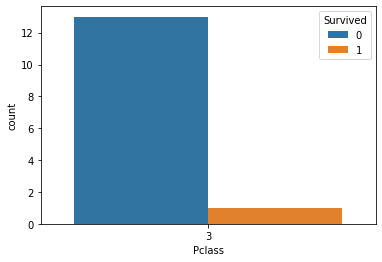

In [114]:
sns.countplot(x='Pclass', hue='Survived', data=df_train_CA_n)

In [115]:
df_train_CA_n['Ticket'].value_counts()

CA. 2343    7
CA 2144     6
CA. 2314    1
Name: Ticket, dtype: int64

## Ticket[C.A.]さんはPC2&3, [CA]さんはPC3

## Ticket が英単語で始まる人は混ざっている?
## ただアルファベットではじまるticketには適用できない？

## 確定できないので、pclass別のdfを作ろう

In [116]:
df_train_p1 = df_train1.loc[df_train1['Pclass']==1]
df_train_p2 = df_train1.loc[df_train1['Pclass']==2]
df_train_p3 = df_train1.loc[df_train1['Pclass']==3]

In [117]:
df_train_p1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Honorifics,Relation,alone,r_many
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,0.786845,C85,C,Mrs.,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,0.420730,C123,S,Mrs.,1,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,0.395814,E46,S,Mr.,0,1,0
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,-0.113846,C103,S,Miss.,0,1,0
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,0.066360,A6,S,Mr.,0,1,0


In [118]:
p1 = df_train_p1['Ticket'].str[:3].unique()
p1

array(['PC ', '113', '174', '199', '369', 'W.E', '352', '110', '117',
       '111', '177', '112', '118', '135', '198', '119', '169', '336',
       '127', 'WE/', '693', '130', '270', '132', '572', 'F.C', '241',
       '695'], dtype=object)

In [119]:
p2 = df_train_p2['Ticket'].str[:3].unique()
p2

array(['237', '248', '244', '239', 'C.A', '116', 'SC/', '292', 'S.O',
       'SO/', '231', '272', '228', '230', '250', '234', '284', 'F.C',
       '243', 'W/C', '220', 'SW/', '236', '267', '286', 'SCO', 'W./',
       '226', 'P/P', '290', '285', '229', '314', '278', 'SC ', '240',
       '291', '282', '200', '310', '263', '218', 'S.W', '219', '297',
       '223', '342', '122', '233', 'S.C', '281', '211'], dtype=object)

In [120]:
p3 = df_train_p3['Ticket'].str[:3].unique()
p3

array(['A/5', 'STO', '373', '330', '349', '347', 'PP ', '350', '382',
       '345', '264', '263', '335', '267', 'A./', '265', '754', 'S.C',
       '370', '143', '266', '310', 'A/4', '269', 'CA ', 'S.P', '315',
       '268', '160', '348', '374', '364', 'W./', 'SOT', '343', 'C.A',
       '312', '371', '324', '413', '262', 'A4.', 'C 1', '753', '365',
       'A.5', 'Fa ', '358', 'CA.', '363', 'LIN', '368', '457', '367',
       '214', '362', '384', '336', '923', '759', '386', '726', 'C 7',
       '323', '341', '394', '376', '653', 'A/S', '755', '346', 'C 4',
       '270', '372', '149', '546', '334', 'S.O', '847', '342', '656',
       '392', '383', '124', '222'], dtype=object)

In [121]:
df_train1['Ticket'].str[:3].unique()

array(['A/5', 'PC ', 'STO', '113', '373', '330', '174', '349', '347',
       '237', 'PP ', '350', '248', '382', '244', '345', '264', '239',
       '263', '199', '335', 'C.A', '267', 'A./', '265', '754', '116',
       'SC/', 'S.C', '370', '143', '266', '310', 'A/4', '292', '269',
       'CA ', '369', 'S.P', '315', 'S.O', '268', '160', '348', '374',
       '364', 'SO/', 'W./', 'SOT', '343', 'W.E', '231', '352', '312',
       '371', '110', '324', '413', '262', 'A4.', '272', 'C 1', '228',
       '117', '753', '365', '230', 'A.5', 'Fa ', '358', 'CA.', '363',
       '111', '177', '250', 'LIN', '234', '284', '368', '457', '367',
       '112', 'F.C', '243', '118', 'W/C', '220', '214', 'SW/', '236',
       '286', 'SCO', '362', '384', '135', '336', '198', '119', '923',
       '226', 'P/P', '290', '169', '285', '759', '229', '314', '386',
       '726', 'C 7', '323', '278', 'SC ', '240', '341', '291', '394',
       '282', '200', '376', '653', 'A/S', '755', '346', 'C 4', '127',
       '270', 'WE/',

## PClass別にTicketの最初3文字をとって、それぞれPclassが違くても重複している文字を調べる

In [122]:
p123 = np.concatenate([p1, p2, p3])
p123_df = pd.DataFrame(
    np.unique(p123, return_counts=True),
    index=['Initial', 'count']
).T
np.unique(p123, return_counts=True)

(array(['110', '111', '112', '113', '116', '117', '118', '119', '122',
        '124', '127', '130', '132', '135', '143', '149', '160', '169',
        '174', '177', '198', '199', '200', '211', '214', '218', '219',
        '220', '222', '223', '226', '228', '229', '230', '231', '233',
        '234', '236', '237', '239', '240', '241', '243', '244', '248',
        '250', '262', '263', '264', '265', '266', '267', '268', '269',
        '270', '272', '278', '281', '282', '284', '285', '286', '290',
        '291', '292', '297', '310', '312', '314', '315', '323', '324',
        '330', '334', '335', '336', '341', '342', '343', '345', '346',
        '347', '348', '349', '350', '352', '358', '362', '363', '364',
        '365', '367', '368', '369', '370', '371', '372', '373', '374',
        '376', '382', '383', '384', '386', '392', '394', '413', '457',
        '546', '572', '653', '656', '693', '695', '726', '753', '754',
        '755', '759', '847', '923', 'A./', 'A.5', 'A/4', 'A/5', 'A/S',
      

In [123]:
p123_df

,Initial,count
0,110,1
1,111,1
2,112,1
3,113,1
4,116,1
...,...,...
149,SW/,1
150,W./,2
151,W.E,1
152,W/C,1


In [124]:
p123_df.loc[p123_df['count']>=2]

,Initial,count
47,263,2
51,267,2
54,270,2
66,310,2
75,336,2
77,342,2
130,C.A,2
133,F.C,2
139,S.C,2
140,S.O,2


In [125]:
df_train1.loc[df_train1['Ticket'].str[:3]=='267']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Honorifics,Relation,alone,r_many
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,-0.502864,NaN,C,Mr.,0,1,0
140,141,0,3,"Boulos, Mrs. Joseph (Sultana)",female,NaN,0,2,2678,-0.341452,NaN,C,Mrs.,2,0,0
236,237,0,2,"Hold, Mr. Stephen",male,44.0,1,0,26707,-0.124920,NaN,S,Mr.,1,0,0
693,694,0,3,"Saad, Mr. Khalil",male,25.0,0,0,2672,-0.502949,NaN,C,Mr.,0,1,0
773,774,0,3,"Elias, Mr. Dibo",male,NaN,0,0,2674,-0.502949,NaN,C,Mr.,0,1,0
832,833,0,3,"Saad, Mr. Amin",male,NaN,0,0,2671,-0.502864,NaN,C,Mr.,0,1,0
852,853,0,3,"Boulos, Miss. Nourelain",female,9.0,1,1,2678,-0.341452,NaN,C,Miss.,2,0,0


In [126]:
df_train1.loc[df_train1['Ticket'].str[:3]=='W./']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Honorifics,Relation,alone,r_many
86,87,0,3,"Ford, Mr. William Neal",male,16.0,1,3,W./C. 6608,0.043708,NaN,S,Mr.,4,0,1
147,148,0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.0,2,2,W./C. 6608,0.043708,NaN,S,Miss.,4,0,1
235,236,0,3,"Harknett, Miss. Alice Phoebe",female,NaN,0,0,W./C. 6609,-0.496405,NaN,S,Miss.,0,1,0
242,243,0,2,"Coleridge, Mr. Reginald Charles",male,29.0,0,0,W./C. 14263,-0.437007,NaN,S,Mr.,0,1,0
436,437,0,3,"Ford, Miss. Doolina Margaret ""Daisy""",female,21.0,2,2,W./C. 6608,0.043708,NaN,S,Miss.,4,0,1
526,527,1,2,"Ridsdale, Miss. Lucy",female,50.0,0,0,W./C. 14258,-0.437007,NaN,S,Miss.,0,1,0
736,737,0,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,1,3,W./C. 6608,0.043708,NaN,S,Mrs.,4,0,1
783,784,0,3,"Johnston, Mr. Andrew G",male,NaN,1,2,W./C. 6607,-0.176263,NaN,S,Mr.,3,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,-0.176263,NaN,S,Miss.,3,0,0


## 数字が４桁だとPclass==3 ！？ 関係ない！？

In [127]:
df_train_p3['Ticket'].value_counts()

1601        7
CA. 2343    7
347082      7
347088      6
3101295     6
           ..
349219      1
350046      1
349218      1
312992      1
350036      1
Name: Ticket, Length: 394, dtype: int64

In [128]:
df_train_p1['Ticket'].unique()

array(['PC 17599', '113803', '17463', '113783', '113788', '19950',
       'PC 17601', 'PC 17569', 'PC 17604', '113789', 'PC 17572', '113509',
       '19947', '113572', '36973', 'PC 17605', '113059', 'W.E.P. 5734',
       'PC 17754', 'PC 17759', '35281', '110465', 'PC 17558', '11752',
       'PC 17593', '113776', 'PC 17597', '113505', 'PC 17318', '111240',
       '17764', 'PC 17595', '113767', '111428', 'PC 17610', '112277',
       '35273', '11813', '19943', '19928', '11751', '113514', 'PC 17585',
       '110152', 'PC 17755', '110413', '112059', 'PC 17582', 'PC 17760',
       '113798', 'PC 17596', '13502', '113056', '19877', '11967',
       'PC 17612', '113781', '19988', '17421', 'PC 17758', 'PC 17485',
       '11767', 'PC 17608', '36928', '16966', '111361', '113043',
       'PC 17611', '113784', '113510', '110813', 'PC 17477', '11765',
       '113503', 'PC 17757', '113760', '110564', '13507', '33638',
       '113794', '113786', '113051', '17453', '13509', '17464', '19952',
       '1113

In [129]:
df_train_p2['Ticket'].unique()

array(['237736', '248706', '244373', '239865', '248698', 'C.A. 24579',
       '11668', 'SC/Paris 2123', '2926', 'C.A. 31026', 'C.A. 34651',
       'C.A. 29395', 'C.A. 33111', 'S.O.C. 14879', '248738', 'SO/C 14885',
       '231919', '244367', '27267', '228414', 'C.A. 29178',
       'SC/PARIS 2133', '231945', 'C.A. 33112', '230080', '244310',
       'S.O.P. 1166', 'C.A. 33595', '250653', 'SC/PARIS 2131', '230136',
       '234604', '28424', '248747', 'F.C.C. 13528', '250646', '243847',
       'W/C 14208', '220367', 'SW/PP 751', '236171', '237442',
       'C.A. 29566', '26707', 'C.A. 31921', '28665', 'SCO/W 1585',
       'W./C. 14263', '250649', '244252', '230433', 'C.A. 17248',
       '250644', '239853', '237798', 'SC/Paris 2163', '226593',
       'P/PP 3381', '250651', 'F.C.C. 13529', '29011', '234818', '28551',
       '248740', '244361', '229236', '248733', '31418', '237671',
       'SC/PARIS 2167', '27849', 'SC 1748', '28403', '244278', '240929',
       '28664', '29106', '28220', '2506

## Ticket は非常に複雑だが、「特定の頭文字だと死亡率が異常に大きい」とかあればそれを抽出して新しい特徴量にしたい

## とりあえずそれぞれの頭文字別にmeanを見てみる

In [130]:
for n in df_train1['Ticket'].str[:3].unique():
    print(n)
    print(df_train1['Ticket'].loc[df_train1['Ticket'].str[:3]==n].count())
    print(df_train1['Survived'].loc[df_train1['Ticket'].str[:3]==n].mean())
    print('')

A/5
17
0.11764705882352941

PC 
60
0.65

STO
18
0.4444444444444444

113
47
0.46808510638297873

373
1
0.0

330
11
0.6363636363636364

174
12
0.8333333333333334

349
53
0.05660377358490566

347
48
0.22916666666666666

237
8
0.5

PP 
3
0.6666666666666666

350
18
0.2222222222222222

248
12
0.5833333333333334

382
7
0.14285714285714285

244
10
0.3

345
19
0.15789473684210525

264
4
0.25

239
8
0.0

263
3
0.6666666666666666

199
14
0.7142857142857143

335
2
0.5

C.A
28
0.4642857142857143

267
7
0.14285714285714285

A./
2
0.0

265
7
0.8571428571428571

754
3
0.0

116
2
0.0

SC/
12
0.5

S.C
3
0.3333333333333333

370
12
0.3333333333333333

143
3
1.0

266
15
0.6666666666666666

310
19
0.2631578947368421

A/4
6
0.0

292
1
1.0

269
9
0.1111111111111111

CA 
6
0.0

369
8
0.625

S.P
1
0.0

315
14
0.14285714285714285

S.O
9
0.0

268
6
0.16666666666666666

160
7
0.7142857142857143

348
3
0.0

374
3
0.0

364
14
0.14285714285714285

SO/
1
1.0

W./
9
0.1111111111111111

SOT
17
0.11764705882352941

343
4

## 死亡率が顕著に違う頭文字を炙り出すためにifを使ってみる

In [131]:
for n in df_train1['Ticket'].str[:3].unique():
    count = df_train1['Ticket'].loc[df_train1['Ticket'].str[:3]==n].count()
    mean = round(df_train1['Survived'].loc[df_train1['Ticket'].str[:3]==n].mean(), 3)
    if count>5:
        if mean<0.250:
            print(n)
            print(count)
            print(mean)
            print('')
print('-----------------------------------------------------------------------')
for n in df_train1['Ticket'].str[:3].unique():
    count = df_train1['Ticket'].loc[df_train1['Ticket'].str[:3]==n].count()
    mean = round(df_train1['Survived'].loc[df_train1['Ticket'].str[:3]==n].mean(), 3)
    if count>5:
        if mean>0.600:
            print(n)
            print(count)
            print(mean)
            print('')

A/5
17
0.118

349
53
0.057

347
48
0.229

350
18
0.222

382
7
0.143

345
19
0.158

239
8
0.0

267
7
0.143

A/4
6
0.0

269
9
0.111

CA 
6
0.0

315
14
0.143

S.O
9
0.0

268
6
0.167

364
14
0.143

W./
9
0.111

SOT
17
0.118

413
9
0.222

CA.
8
0.125

-----------------------------------------------------------------------
PC 
60
0.65

330
11
0.636

174
12
0.833

199
14
0.714

265
7
0.857

266
15
0.667

369
8
0.625

160
7
0.714

110
10
0.7

117
11
0.909

230
8
0.875

111
8
0.75

367
9
0.667

F.C
6
0.667

135
8
0.75

291
7
0.714



## 生存率が25%以下であるチケット頭3文字
        [A/5, 349, 347, 350, 382, 345, 239, 267, A/4, 269, CA , 315, S.0, 269, 364, W./, SOT, 413, CA.]
## 生存率が60%異常であるチケット頭3文字
        [PC, 330, 174, 199, 265, 266, 369, 160, 110, 117, 230, 111, 367, F.C, 135, 291]
        
### これらから特徴量作成

In [132]:
dead_ticket = ["A/5", "349", "347", "350", "382", "345", "239", "267", "A/4", "269", "CA ", "315", "S.0", "269", "364", "W./", "SOT", "413", "CA."]
live_ticket = ["PC ", "330", "174", "199", "265", "266", "369", "160", "110", "117", "230", "111", "367", "F.C", "135", "291"]

In [133]:
df_train1['Dead_Ticket'] = df_train1['Ticket'].str[:3].apply(lambda x: 1 if x in dead_ticket else 0)
df_train1['Live_Ticket'] = df_train1['Ticket'].str[:3].apply(lambda x: 1 if x in live_ticket else 0)

df_test1['Dead_Ticket'] = df_test1['Ticket'].str[:3].apply(lambda x: 1 if x in dead_ticket else 0)
df_test1['Live_Ticket'] = df_test1['Ticket'].str[:3].apply(lambda x: 1 if x in live_ticket else 0)

In [134]:
df_train1.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Honorifics,Relation,alone,r_many,Dead_Ticket,Live_Ticket
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,-0.502445,NaN,S,Mr.,1,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,0.786845,C85,C,Mrs.,1,0,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,-0.488854,NaN,S,Miss.,0,1,0,0,0


0.13382899628252787
0.4919614147909968


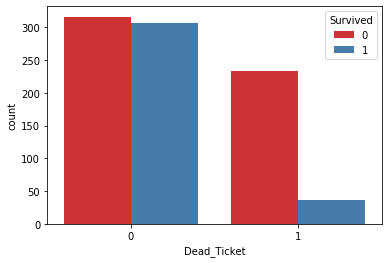

In [135]:
print(df_train1['Survived'].loc[df_train1['Dead_Ticket']==1].mean())
print(df_train1['Survived'].loc[df_train1['Dead_Ticket']==0].mean())
sns.countplot(x='Dead_Ticket', hue='Survived', palette='Set1', data=df_train1)

0.7114427860696517
0.28840579710144926


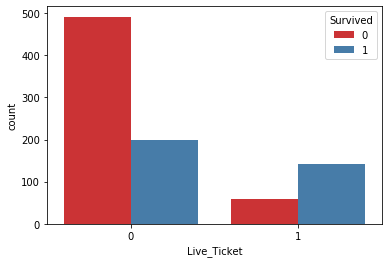

In [136]:
print(df_train1['Survived'].loc[df_train1['Live_Ticket']==1].mean())
print(df_train1['Survived'].loc[df_train1['Live_Ticket']==0].mean())
sns.countplot(x='Live_Ticket', hue='Survived', palette='Set1', data=df_train1)

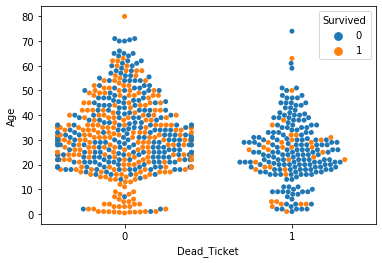

In [137]:
sns.swarmplot(x='Dead_Ticket', y='Age', hue='Survived', data=df_train1)

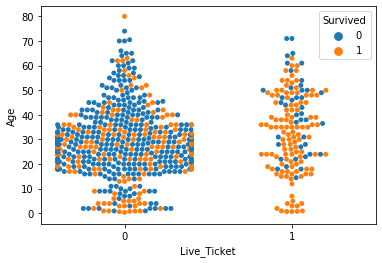

In [138]:
sns.swarmplot(x='Live_Ticket', y='Age', hue='Survived', data=df_train1)

## 新しい変数として使えそう

## ここをさらに見てみる

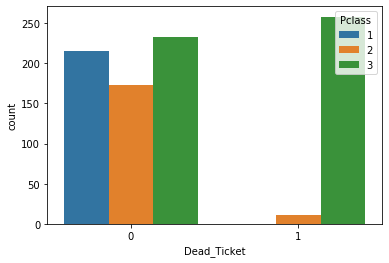

In [139]:
sns.countplot(x='Dead_Ticket', hue='Pclass', data=df_train1)

## Dead_TicketはやっぱりPclass3が多い！！！！ただ、Pclass3の中でもDead_Ticketではないやつもちゃんと汲み取れている

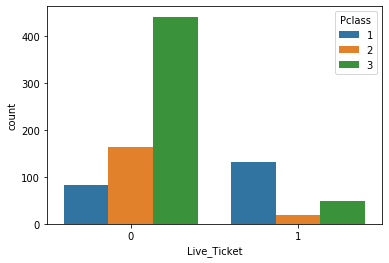

In [140]:
sns.countplot(x='Live_Ticket', hue='Pclass', data=df_train1)

## Live_TicketはPclass1が多い。Pclass2はDeadでもLiveでもない

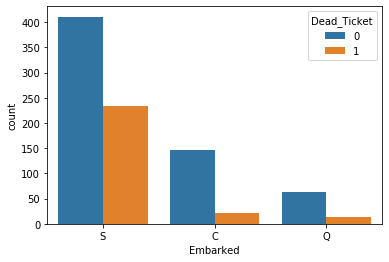

In [141]:
sns.countplot(x='Embarked', hue='Dead_Ticket', data=df_train1)

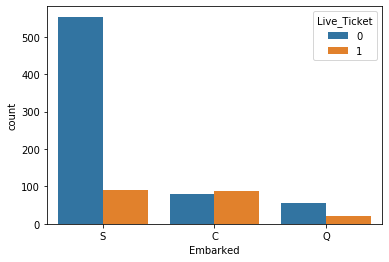

In [142]:
sns.countplot(x='Embarked', hue='Live_Ticket', data=df_train1)

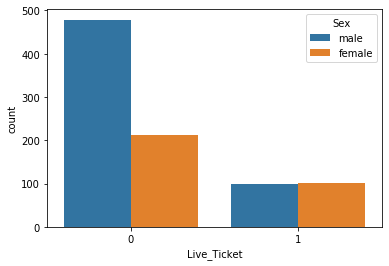

In [143]:
sns.countplot(x='Live_Ticket', hue='Sex', data=df_train1)

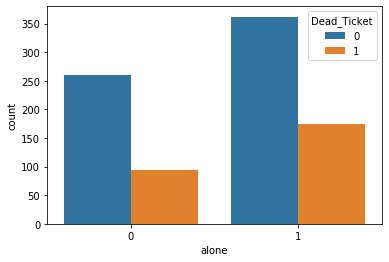

In [144]:
sns.countplot(x='alone', hue='Dead_Ticket', data=df_train1)

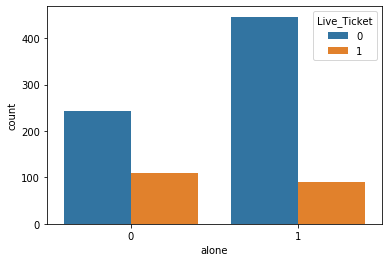

In [145]:
sns.countplot(x='alone', hue='Live_Ticket', data=df_train1)

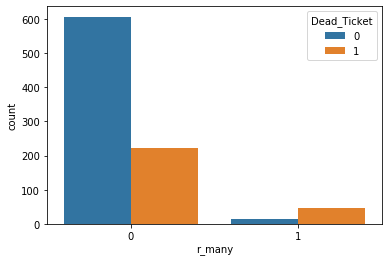

In [146]:
sns.countplot(x='r_many', hue='Dead_Ticket', data=df_train1)

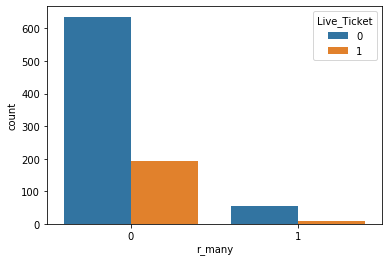

In [147]:
sns.countplot(x='r_many', hue='Live_Ticket', data=df_train1)

---

In [148]:
df_train1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Honorifics,Relation,alone,r_many,Dead_Ticket,Live_Ticket
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,-0.502445,NaN,S,Mr.,1,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,0.786845,C85,C,Mrs.,1,0,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,-0.488854,NaN,S,Miss.,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,0.420730,C123,S,Mrs.,1,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,-0.486337,NaN,S,Mr.,0,1,0,0,0


In [149]:
df_train['Honorifics'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Col.           2
Mlle.          2
Major.         2
Mme.           1
Jonkheer.      1
Capt.          1
Don.           1
Lady.          1
Ms.            1
Sir.           1
the            1
Name: Honorifics, dtype: int64

In [150]:
df_train['Honorifics'].loc[df_train['Sex']=='male'].value_counts()

Mr.          517
Master.       40
Rev.           6
Dr.            6
Major.         2
Col.           2
Capt.          1
Jonkheer.      1
Don.           1
Sir.           1
Name: Honorifics, dtype: int64

In [151]:
df_train['Honorifics'].loc[df_train['Sex']=='female'].value_counts()

Miss.    182
Mrs.     125
Mlle.      2
Mme.       1
the        1
Ms.        1
Dr.        1
Lady.      1
Name: Honorifics, dtype: int64

In [152]:
df_train1['Honorifics'] = df_train1['Honorifics'].replace(['Dr.', 'Rev.', 'Col.', 'Major.', 'Sir.', 'Capt.', 'Jonkheer.', 'Don.', 'Mlle.', 'Lady.', 'Ms.', 'Mme.', 'the'], 'Rare')

df_test1['Honorifics'] = df_test1['Honorifics'].replace(['Dr.', 'Rev.', 'Col.', 'Major.', 'Sir.', 'Capt.', 'Jonkheer.', 'Don.', 'Mlle.', 'Lady.', 'Ms.', 'Mme.', 'the', 'Dona.'], 'Rare')

In [153]:
df_train1['Honorifics'].value_counts()

Mr.        517
Miss.      182
Mrs.       125
Master.     40
Rare        27
Name: Honorifics, dtype: int64

In [154]:
df_test1['Honorifics'].value_counts()

Mr.        240
Miss.       78
Mrs.        72
Master.     21
Rare         7
Name: Honorifics, dtype: int64

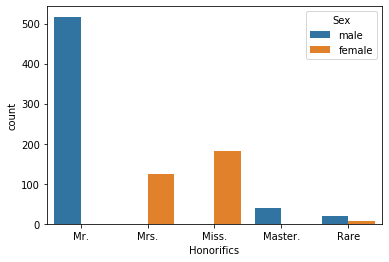

In [155]:
sns.countplot(x='Honorifics', hue='Sex', data=df_train1)

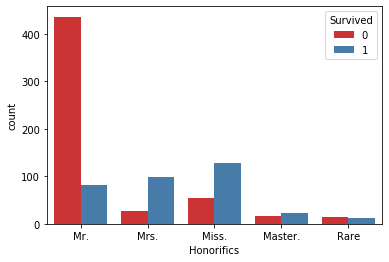

In [156]:
sns.countplot(x='Honorifics', hue='Survived', palette='Set1', data=df_train1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


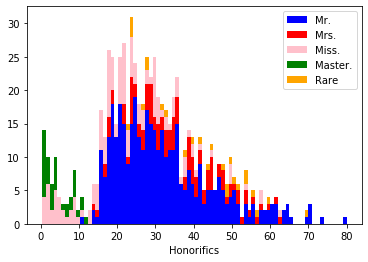

In [157]:
Mr = df_train1['Age'].loc[df_train1['Honorifics']=='Mr.']
Mrs = df_train1['Age'].loc[df_train1['Honorifics']=='Mrs.']
Miss = df_train1['Age'].loc[df_train1['Honorifics']=='Miss.']
Master = df_train1['Age'].loc[df_train1['Honorifics']=='Master.']
Rare = df_train1['Age'].loc[df_train1['Honorifics']=='Rare']


fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.hist([Mr, Mrs, Miss, Master, Rare], bins=80, color=['blue', 'red', 'pink', 'green', 'orange'], label=['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Rare'], histtype='bar', stacked=True)
ax.set_xlabel('Honorifics')
ax.legend()
fig.show()

In [158]:
for n in [Mr, Mrs, Miss, Master, Rare]:
    print(n.min(), '~', n.max(), n.mean())
    print('')

11.0 ~ 80.0 32.368090452261306

14.0 ~ 63.0 35.898148148148145

0.75 ~ 63.0 21.773972602739725

0.42 ~ 12.0 4.574166666666667

23.0 ~ 70.0 42.38461538461539



In [159]:
df_mr = df_train1.loc[df_train1['Honorifics']=='Mr.']
df_mrs = df_train1.loc[df_train1['Honorifics']=='Mrs.']
df_miss = df_train1.loc[df_train1['Honorifics']=='Miss.']
df_master = df_train1.loc[df_train1['Honorifics']=='Master.']
df_rare = df_train1.loc[df_train1['Honorifics']=='Rare']

In [160]:
df_master.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Honorifics,Relation,alone,r_many,Dead_Ticket,Live_Ticket
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,-0.224083,NaN,S,Master.,4,0,1,1,0
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,-0.061999,NaN,Q,Master.,5,0,1,1,0
50,51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,0.150674,NaN,S,Master.,5,0,1,0,0
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,0.295895,NaN,S,Master.,7,0,1,1,0
63,64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,-0.086664,NaN,S,Master.,5,0,1,1,0


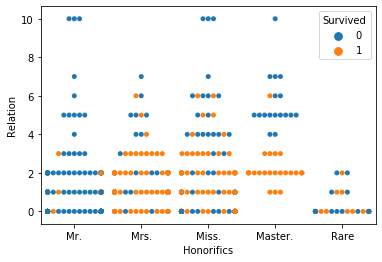

In [161]:
sns.swarmplot(x='Honorifics', y='Relation', hue='Survived', data=df_train1)

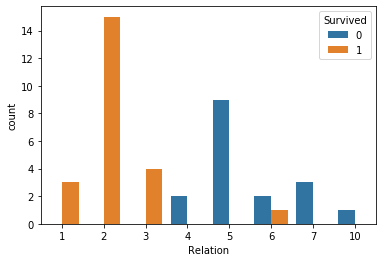

In [162]:
sns.countplot(x='Relation', hue='Survived', data=df_master)

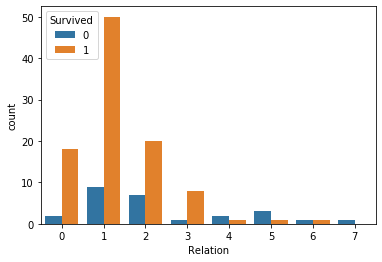

In [163]:
sns.countplot(x='Relation', hue='Survived', data=df_mrs)

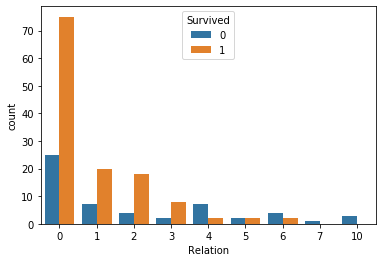

In [164]:
sns.countplot(x='Relation', hue='Survived', data=df_miss)

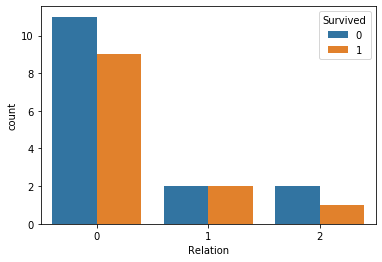

In [165]:
sns.countplot(x='Relation', hue='Survived', data=df_rare)

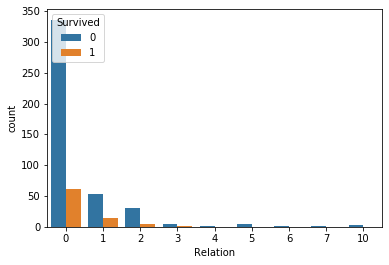

In [166]:
sns.countplot(x='Relation', hue='Survived', data=df_mr)

## Mrs, Miss, Masterは同伴が少なかったら生き残っている確率高い
## MrだけSurvivedがRelationに依存していない！！！
## =>r_many, aloneってやつはMr含めてはいけない。aloneに死者が多かったのはMr.さんが多かったから？

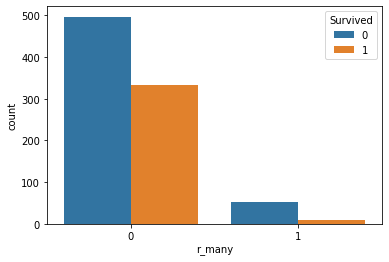

In [167]:
sns.countplot(x='r_many', hue='Survived', data=df_train1)

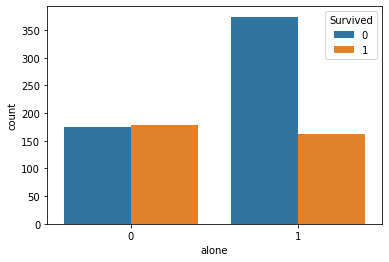

In [168]:
sns.countplot(x='alone', hue='Survived', data=df_train1)

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([5., 3., 1., 2., 3., 5., 3., 3., 0., 1.]),
 array([23. , 27.7, 32.4, 37.1, 41.8, 46.5, 51.2, 55.9, 60.6, 65.3, 70. ]),
 <a list of 10 Patch objects>)

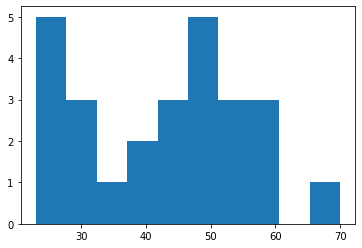

In [169]:
plt.hist(df_rare['Age'], bins=10)

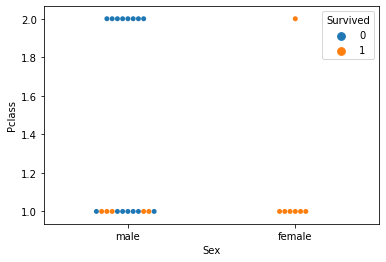

In [170]:
sns.swarmplot(x='Sex', y='Pclass', hue='Survived', data=df_rare)

In [171]:
df_rare.loc[df_rare['Sex']=='female']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Honorifics,Relation,alone,r_many,Dead_Ticket,Live_Ticket
369,370,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,0.746912,B35,C,Rare,0,1,0,0,1
443,444,1,2,"Reynaldo, Ms. Encarnacion",female,28.0,0,0,230434,-0.386671,NaN,S,Rare,0,1,0,0,1
556,557,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,11755,0.148912,A16,C,Rare,1,0,0,0,1
641,642,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,0.746912,B35,C,Rare,0,1,0,0,1
710,711,1,1,"Mayne, Mlle. Berthe Antonine (""Mrs de Villiers"")",female,24.0,0,0,PC 17482,0.348330,C90,C,Rare,0,1,0,0,1
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,1.093229,B77,S,Rare,0,1,0,0,1
796,797,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,-0.126345,D17,S,Rare,0,1,0,0,1


In [172]:
df_train1 = df_train1.drop(['alone', 'r_many'], axis=1)

## Mrs. Miss. Master さんで3人以下で来ている人、Rareで女性の方は死亡率低いので抽出して、新しいカラム`Live_name`作成

In [173]:
def func_mrsster(x):
    if x.Honorifics in ['Mrs.', 'Miss.', 'Master.']:
        if x.Relation<=3:
            return 1
        else:
            return 0
    elif x.Honorifics=='Rare':
        if x.Sex=='female':
            return 1
        else:
            return 0
    else:
        return 0

In [174]:
df_train1['Live_name'] = df_train1.apply(lambda x: func_mrsster(x), axis=1)

df_test1['Live_name'] = df_test1.apply(lambda x: func_mrsster(x), axis=1)

In [175]:
df_train1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Honorifics,Relation,Dead_Ticket,Live_Ticket,Live_name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,-0.502445,NaN,S,Mr.,1,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,0.786845,C85,C,Mrs.,1,0,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,-0.488854,NaN,S,Miss.,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,0.420730,C123,S,Mrs.,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,-0.486337,NaN,S,Mr.,0,0,0,0


In [176]:
df_test1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Honorifics,Relation,Dead_Ticket,Live_Ticket,Live_name
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,-0.497811,NaN,Q,Mr.,0,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,-0.512660,NaN,S,Mrs.,1,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,-0.464532,NaN,Q,Mr.,0,0,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,-0.482888,NaN,S,Mr.,0,1,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,-0.417971,NaN,S,Mrs.,2,0,0,1


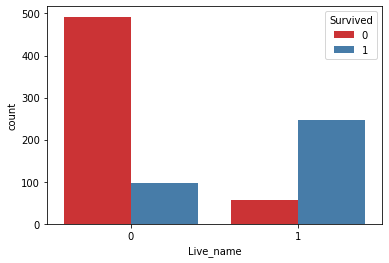

In [177]:
sns.countplot(x='Live_name', hue='Survived', palette='Set1', data=df_train1)

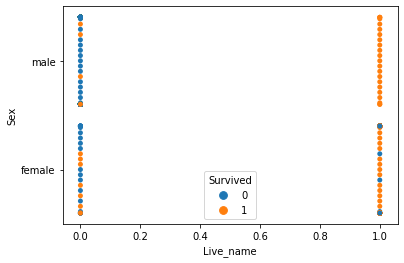

In [178]:
sns.swarmplot(x='Live_name', y='Sex', hue='Survived', data=df_train1)

--- 

## Cabinを見てみよう

In [179]:
df_train['Cabin'].value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
C22 C26        3
F33            3
              ..
A16            1
B86            1
C90            1
A14            1
C30            1
Name: Cabin, Length: 147, dtype: int64

In [180]:
df_train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [181]:
df_train[df_train['Cabin']=='G6']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Honorifics
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,-0.312172,G6,S,Miss.
205,206,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,-0.437762,G6,S,Miss.
251,252,0,3,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",female,29.0,1,1,347054,-0.437762,G6,S,Mrs.
394,395,1,3,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0,0,2,PP 9549,-0.312172,G6,S,Mrs.


In [182]:
df_train[df_train['Cabin']=='B96 B98']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Honorifics
390,391,1,1,"Carter, Mr. William Ernest",male,36.0,1,2,113760,1.767741,B96 B98,S,Mr.
435,436,1,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,1.767741,B96 B98,S,Miss.
763,764,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.0,1,2,113760,1.767741,B96 B98,S,Mrs.
802,803,1,1,"Carter, Master. William Thornton II",male,11.0,1,2,113760,1.767741,B96 B98,S,Master.


In [183]:
df_train[df_train['Cabin']=='C23 C25 C27']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Honorifics
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,4.647001,C23 C25 C27,S,Mr.
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,4.647001,C23 C25 C27,S,Miss.
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,4.647001,C23 C25 C27,S,Miss.
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,4.647001,C23 C25 C27,S,Mr.


In [184]:
df_train1[df_train1['Cabin']=='B57 B59 B63 B66']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Honorifics,Relation,Dead_Ticket,Live_Ticket,Live_name
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,4.634417,B57 B59 B63 B66,C,Miss.,4,0,1,0
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,4.634417,B57 B59 B63 B66,C,Miss.,4,0,1,0


In [185]:
df_train1['Exis_Cabin'] = np.where(df_train1['Cabin'].isnull(), 0, 1)

df_test1['Exis_Cabin'] = np.where(df_test1['Cabin'].isnull(), 0, 1)

## Cabinがvalue存在していれば1, 欠損値であれば0を返す新しいカラム`Exis_Cabin`を作成

In [186]:
df_train1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Honorifics,Relation,Dead_Ticket,Live_Ticket,Live_name,Exis_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,-0.502445,NaN,S,Mr.,1,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,0.786845,C85,C,Mrs.,1,0,1,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,-0.488854,NaN,S,Miss.,0,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,0.420730,C123,S,Mrs.,1,0,0,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,-0.486337,NaN,S,Mr.,0,0,0,0,0


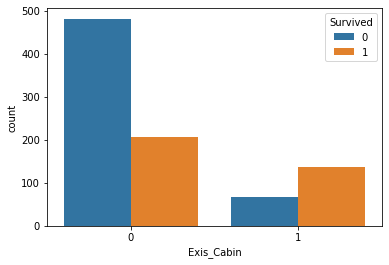

In [187]:
sns.countplot(x='Exis_Cabin', hue='Survived', data=df_train1)

## Cabinに値が存在している人は生存率高い

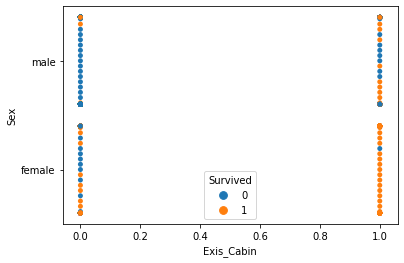

In [188]:
sns.swarmplot(x='Exis_Cabin', y='Sex', hue='Survived', data=df_train1)

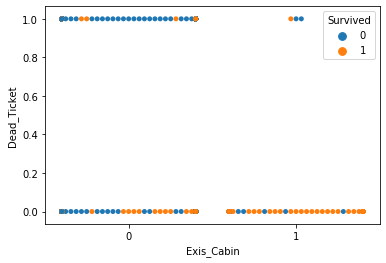

In [189]:
sns.swarmplot(x='Exis_Cabin', y='Dead_Ticket', hue='Survived', data=df_train1)

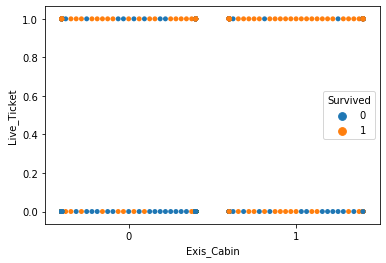

In [190]:
sns.swarmplot(x='Exis_Cabin', y='Live_Ticket', hue='Survived', data=df_train1)

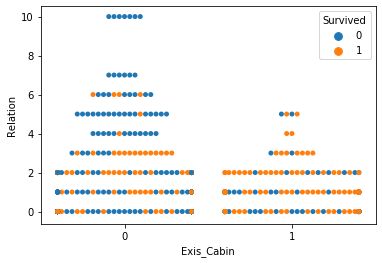

In [191]:
sns.swarmplot(x='Exis_Cabin', y='Relation', hue='Survived', data=df_train1)

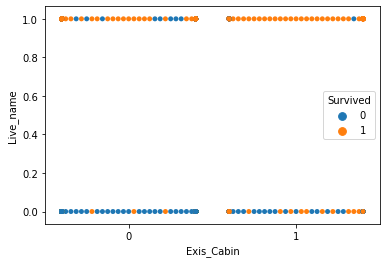

In [192]:
sns.swarmplot(x='Exis_Cabin', y='Live_name', hue='Survived', data=df_train1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


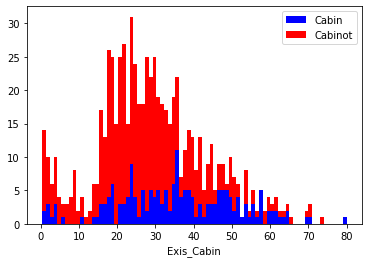

In [193]:
Cabin = df_train1['Age'].loc[df_train1['Exis_Cabin']==1]
Cabinot = df_train1['Age'].loc[df_train1['Exis_Cabin']==0]


fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.hist([Cabin, Cabinot], bins=80, color=['blue', 'red'], label=['Cabin', 'Cabinot'], histtype='bar', stacked=True)
ax.set_xlabel('Exis_Cabin')
ax.legend()
fig.show()

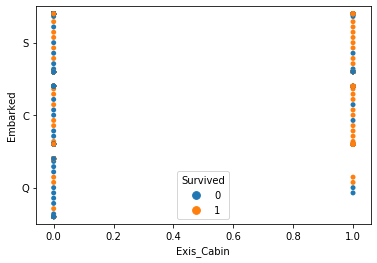

In [194]:
sns.swarmplot(x='Exis_Cabin', y='Embarked', hue='Survived', data=df_train1)

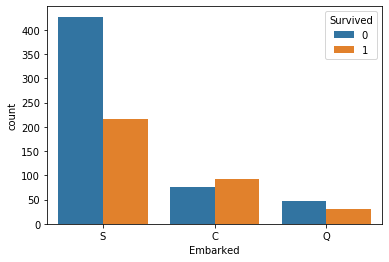

In [195]:
sns.countplot(x='Embarked', hue='Survived', data=df_train1)

## Cabinの頭文字をとったカラム`Cabin_New`を作成

In [196]:
df_train1['Cabin_New'] = np.where(df_train1['Cabin'].isnull(), 0, df_train['Cabin'].str[0])

In [197]:
df_train1['Cabin_New'].value_counts()

0    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin_New, dtype: int64

In [198]:
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Honorifics   891 non-null    object 
 13  Relation     891 non-null    int64  
 14  Dead_Ticket  891 non-null    int64  
 15  Live_Ticket  891 non-null    int64  
 16  Live_name    891 non-null    int64  
 17  Exis_Cabin   891 non-null    int64  
 18  Cabin_New    891 non-null    object 
dtypes: float

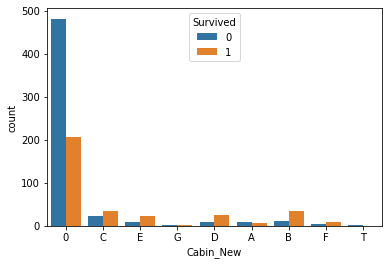

In [199]:
sns.countplot(x='Cabin_New', hue='Survived', data=df_train1)

In [200]:
for n in df_train1['Cabin_New'].unique():
    print(n)
    print(df_train1['Survived'].loc[df_train1['Cabin_New']==n].count())
    print(df_train1['Survived'].loc[df_train1['Cabin_New']==n].mean())
    print('')

0
687
0.29985443959243085

C
59
0.5932203389830508

E
32
0.75

G
4
0.5

D
33
0.7575757575757576

A
15
0.4666666666666667

B
47
0.7446808510638298

F
13
0.6153846153846154

T
1
0.0



## Cabin_Newで分ける必要はなさそう？？

In [201]:
df_train1 = df_train1.drop('Cabin_New', axis=1)

In [202]:
df_train1.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Honorifics,Relation,Dead_Ticket,Live_Ticket,Live_name,Exis_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,-0.502445,NaN,S,Mr.,1,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,0.786845,C85,C,Mrs.,1,0,1,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,-0.488854,NaN,S,Miss.,0,0,0,1,0


## Cabinの欠損値は埋めないでいいかな

---

# Ageが欠損しているデータとしていないデータの違いを見て、欠損している人はできるだけ正確に置換したい 

## Ageの欠損ダミー変数カラム`Age_null`作成

In [203]:
df_train1['Age_null'] =  np.where(df_train1['Age'].isnull(), 1, 0)
df_test1['Age_null'] =  np.where(df_test1['Age'].isnull(), 1, 0)

In [204]:
df_train1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Honorifics,Relation,Dead_Ticket,Live_Ticket,Live_name,Exis_Cabin,Age_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,-0.502445,NaN,S,Mr.,1,1,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,0.786845,C85,C,Mrs.,1,0,1,1,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,-0.488854,NaN,S,Miss.,0,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,0.420730,C123,S,Mrs.,1,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,-0.486337,NaN,S,Mr.,0,0,0,0,0,0


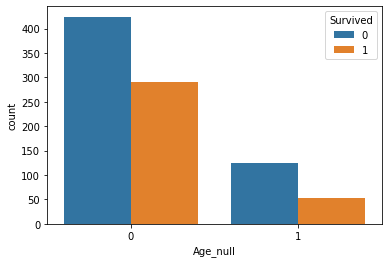

In [205]:
sns.countplot(x='Age_null', hue='Survived', data=df_train1)

## Age欠損していてもあまり生存率には関わらない？

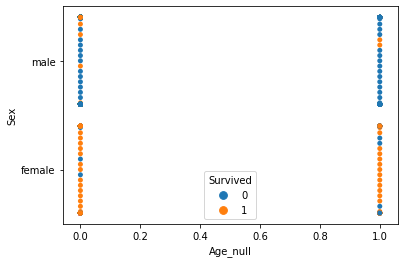

In [206]:
sns.swarmplot(x='Age_null', y='Sex', hue='Survived', data=df_train1)

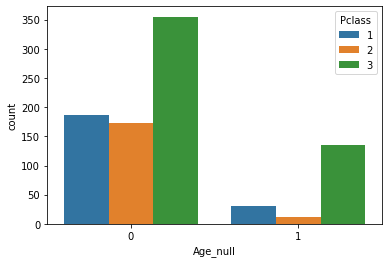

In [207]:
sns.countplot(x='Age_null', hue='Pclass', data=df_train1)

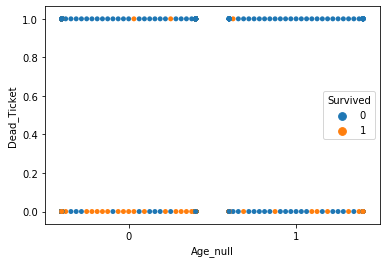

In [208]:
sns.swarmplot(x='Age_null', y='Dead_Ticket', hue='Survived', data=df_train1)

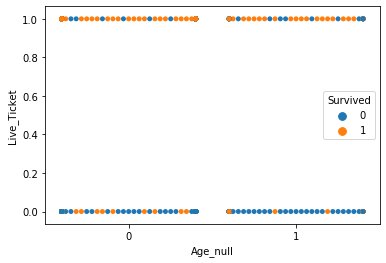

In [209]:
sns.swarmplot(x='Age_null', y='Live_Ticket', hue='Survived', data=df_train1)

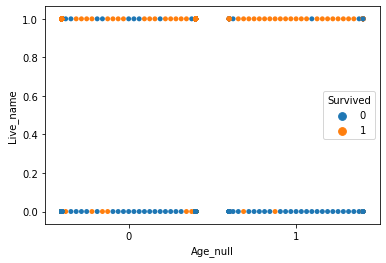

In [210]:
sns.swarmplot(x='Age_null', y='Live_name', hue='Survived', data=df_train1)

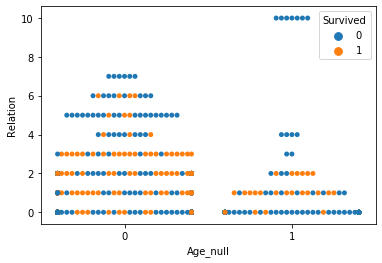

In [211]:
sns.swarmplot(x='Age_null', y='Relation', hue='Survived', data=df_train1)

## 欠損している人はRelation<=4, =10の人だけ。
## 特に0 or 1で多い

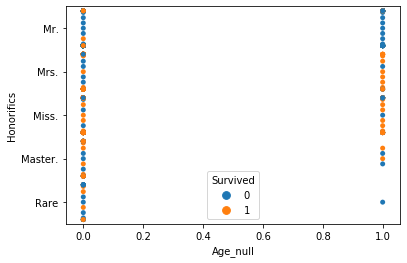

In [212]:
sns.swarmplot(x='Age_null', y='Honorifics', hue='Survived', data=df_train1)

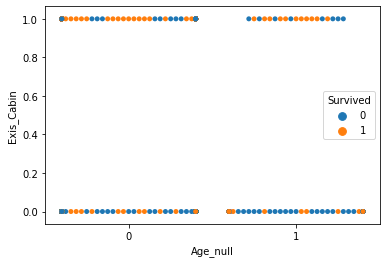

In [213]:
sns.swarmplot(x='Age_null', y='Exis_Cabin', hue='Survived', data=df_train1)

# 特に欠損している人のデータに特徴はない！

## 名前からどうにかしてAge欠損を埋めたい

### ・家族持ちであればそこからなんとなくで推測（ちゃんと形式だてられそうならそうする。
### ・同伴がいなければHonorifics×Aloneの平均で埋める

## `First Name` - `Middle Name` - `Last Name` のカラムを作成

In [214]:
df_train1['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [215]:
df_train_name = df_train1['Name'].str.extract('(.+)\,(.+)\.(.+)', expand=True)
df_test_name = df_test1['Name'].str.extract('(.+)\,(.+)\.(.+)', expand=True)

In [216]:
df_train_name.head()

,0,1,2
0,Braund,Mr,Owen Harris
1,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss,Laina
3,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,Allen,Mr,William Henry


In [217]:
df_train_name.columns = ['First', 'Middle', 'Given']
df_test_name.columns = ['First', 'Middle', 'Given']
#厳密にはMiddleではないが、こうした方が何となくわかりやすい

In [218]:
df_train1 = pd.concat([df_train1, df_train_name], axis=1)
df_test1 = pd.concat([df_test1, df_test_name], axis=1)

In [219]:
df_train1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Honorifics,Relation,Dead_Ticket,Live_Ticket,Live_name,Exis_Cabin,Age_null,First,Middle,Given
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,-0.502445,...,Mr.,1,1,0,0,0,0,Braund,Mr,Owen Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,0.786845,...,Mrs.,1,0,1,1,1,0,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,-0.488854,...,Miss.,0,0,0,1,0,0,Heikkinen,Miss,Laina
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,0.420730,...,Mrs.,1,0,0,1,1,0,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,-0.486337,...,Mr.,0,0,0,0,0,0,Allen,Mr,William Henry


In [220]:
df_train1['First']

0         Braund
1        Cumings
2      Heikkinen
3       Futrelle
4          Allen
         ...    
886     Montvila
887       Graham
888     Johnston
889         Behr
890       Dooley
Name: First, Length: 891, dtype: object

In [221]:
df_train1['Given'].unique()

array([' Owen Harris', ' John Bradley (Florence Briggs Thayer)', ' Laina',
       ' Jacques Heath (Lily May Peel)', ' William Henry', ' James',
       ' Timothy J', ' Gosta Leonard',
       ' Oscar W (Elisabeth Vilhelmina Berg)', ' Nicholas (Adele Achem)',
       ' Marguerite Rut', ' Elizabeth', ' Anders Johan',
       ' Hulda Amanda Adolfina', ' (Mary D Kingcome) ', ' Eugene',
       ' Charles Eugene', ' Julius (Emelia Maria Vandemoortele)',
       ' Fatima', ' Joseph J', ' Lawrence', ' Anna "Annie"',
       ' William Thompson', ' Torborg Danira',
       ' Carl Oscar (Selma Augusta Emilia Johansson)', ' Farred Chehab',
       ' Charles Alexander', ' Ellen "Nellie"', ' Lalio', ' Manuel E',
       ' William Augustus (Marie Eugenie)', ' Mary Agatha', ' Edward H',
       ' Edgar Joseph', ' Alexander Oskar', ' Hanna', ' Ernest Charles',
       ' Augusta Maria', ' Jamila', ' Johan (Johanna Persdotter Larsson)',
       ' William John Robert (Dorothy Ann Wonnacott)', ' Theodor',
       ' Simo

---

# モデリング編

## 欠損値埋めるのには非常に労力を要する
## 欠損しているやつはしているやつでモデリング、欠損していないやつはしていないデータでモデリングしてみる

##   いろいろ整えてモデリングへ

### 今回のモデリングは3種類
- ランダムフォレスト
- ロジスティック回帰
- SVM

In [222]:
df_train1.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Honorifics,Relation,Dead_Ticket,Live_Ticket,Live_name,Exis_Cabin,Age_null,First,Middle,Given
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,-0.502445,...,Mr.,1,1,0,0,0,0,Braund,Mr,Owen Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,0.786845,...,Mrs.,1,0,1,1,1,0,Cumings,Mrs,John Bradley (Florence Briggs Thayer)


In [223]:
df_test1.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Honorifics,Relation,Dead_Ticket,Live_Ticket,Live_name,Exis_Cabin,Age_null,First,Middle,Given
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,-0.497811,NaN,...,Mr.,0,0,1,0,0,0,Kelly,Mr,James
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,-0.512660,NaN,...,Mrs.,1,0,0,1,0,0,Wilkes,Mrs,James (Ellen Needs)


In [224]:
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Honorifics   891 non-null    object 
 13  Relation     891 non-null    int64  
 14  Dead_Ticket  891 non-null    int64  
 15  Live_Ticket  891 non-null    int64  
 16  Live_name    891 non-null    int64  
 17  Exis_Cabin   891 non-null    int64  
 18  Age_null     891 non-null    int64  
 19  First   

In [225]:
df_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Honorifics   418 non-null    object 
 12  Relation     418 non-null    int64  
 13  Dead_Ticket  418 non-null    int64  
 14  Live_Ticket  418 non-null    int64  
 15  Live_name    418 non-null    int64  
 16  Exis_Cabin   418 non-null    int64  
 17  Age_null     418 non-null    int64  
 18  First        418 non-null    object 
 19  Middle  

Fareに欠損値があるみたいなので埋める

In [226]:
df_test1['Fare'] = df_test1['Fare'].fillna(df_train1['Fare'].loc[df_train1['Pclass']==3].mean())

カテゴリー変数sexを数値変数に変換（男性：１）

In [227]:
df_train1['Gender'] = df_train1['Sex'].map({'female':0, 'male':1}).astype(int)
df_test1['Gender'] = df_test1['Sex'].map({'female':0, 'male':1}).astype(int)

In [228]:
df_train1['Embarked'] = df_train1['Embarked'].fillna('S')

EmbarkedとHonorificsもダミー変数に変換

In [229]:
train_Embark_dum = pd.get_dummies(df_train1['Embarked'], drop_first=True)
test_Embark_dum = pd.get_dummies(df_test1['Embarked'], drop_first=True)
train_Hono_dum = pd.get_dummies(df_train1['Honorifics'], drop_first=True)
test_Hono_dum = pd.get_dummies(df_test1['Honorifics'], drop_first=True)

In [230]:
train_Embark_dum 

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [231]:
df_train2 = pd.concat([df_train1, train_Embark_dum, train_Hono_dum], axis=1)
df_test2 = pd.concat([df_test1, test_Embark_dum, test_Hono_dum], axis=1)

In [232]:
df_train2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,First,Middle,Given,Gender,Q,S,Miss.,Mr.,Mrs.,Rare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,-0.502445,...,Braund,Mr,Owen Harris,1,0,1,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,0.786845,...,Cumings,Mrs,John Bradley (Florence Briggs Thayer),0,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,-0.488854,...,Heikkinen,Miss,Laina,0,0,1,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,0.420730,...,Futrelle,Mrs,Jacques Heath (Lily May Peel),0,0,1,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,-0.486337,...,Allen,Mr,William Henry,1,0,1,0,1,0,0


In [233]:
df_train2 = df_train2.drop(['PassengerId', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'Honorifics', 'First', 'Middle', 'Given'], axis=1)
df_test2 = df_test2.drop(['Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'Honorifics', 'First', 'Middle', 'Given'], axis=1)

In [234]:
df_train2.head(2)

,Survived,Pclass,Age,Fare,Relation,Dead_Ticket,Live_Ticket,Live_name,Exis_Cabin,Age_null,Gender,Q,S,Miss.,Mr.,Mrs.,Rare
0,0,3,22.0,-0.502445,1,1,0,0,0,0,1,0,1,0,1,0,0
1,1,1,38.0,0.786845,1,0,1,1,1,0,0,0,0,0,0,1,0


In [235]:
df_test2.head(2)

,PassengerId,Pclass,Age,Fare,Relation,Dead_Ticket,Live_Ticket,Live_name,Exis_Cabin,Age_null,Gender,Q,S,Miss.,Mr.,Mrs.,Rare
0,892,3,34.5,-0.497811,0,0,1,0,0,0,1,1,0,0,1,0,0
1,893,3,47.0,-0.512660,1,0,0,1,0,0,0,0,1,0,0,1,0


In [236]:
df_train_Age1 = df_train2.loc[~(df_train2['Age'].isnull())].drop(['Age_null'], axis=1)
df_train_Age0 = df_train2.loc[df_train2['Age'].isnull()].drop(['Age_null'], axis=1)

df_test_Age1 = df_test2.loc[~(df_test2['Age'].isnull())].drop(['Age_null'], axis=1)
df_test_Age0 = df_test2.loc[df_test2['Age'].isnull()].drop(['Age_null'], axis=1)

In [237]:
df_train_Age1.head(3)

,Survived,Pclass,Age,Fare,Relation,Dead_Ticket,Live_Ticket,Live_name,Exis_Cabin,Gender,Q,S,Miss.,Mr.,Mrs.,Rare
0,0,3,22.0,-0.502445,1,1,0,0,0,1,0,1,0,1,0,0
1,1,1,38.0,0.786845,1,0,1,1,1,0,0,0,0,0,1,0
2,1,3,26.0,-0.488854,0,0,0,1,0,0,0,1,1,0,0,0


In [238]:
df_test_Age1.head(2)

,PassengerId,Pclass,Age,Fare,Relation,Dead_Ticket,Live_Ticket,Live_name,Exis_Cabin,Gender,Q,S,Miss.,Mr.,Mrs.,Rare
0,892,3,34.5,-0.497811,0,0,1,0,0,1,1,0,0,1,0,0
1,893,3,47.0,-0.512660,1,0,0,1,0,0,0,1,0,0,1,0


---

# ランダムフォレスト

In [239]:
from sklearn.ensemble import RandomForestClassifier

In [240]:
clf1 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
clf0 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)

In [241]:
X_train1 = df_train_Age1.drop(['Survived'], axis=1)
X_train0 = df_train_Age0.drop(['Survived', 'Age'], axis=1)

y_train1 = df_train_Age1['Survived']
y_train0 = df_train_Age0['Survived']

X_test1 = df_test_Age1.drop(['PassengerId'], axis=1)
X_test0 = df_test_Age0.drop(['PassengerId', 'Age'], axis=1)

In [242]:
X_train0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 5 to 888
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       177 non-null    int64  
 1   Fare         177 non-null    float64
 2   Relation     177 non-null    int64  
 3   Dead_Ticket  177 non-null    int64  
 4   Live_Ticket  177 non-null    int64  
 5   Live_name    177 non-null    int64  
 6   Exis_Cabin   177 non-null    int64  
 7   Gender       177 non-null    int64  
 8   Q            177 non-null    uint8  
 9   S            177 non-null    uint8  
 10  Miss.        177 non-null    uint8  
 11  Mr.          177 non-null    uint8  
 12  Mrs.         177 non-null    uint8  
 13  Rare         177 non-null    uint8  
dtypes: float64(1), int64(7), uint8(6)
memory usage: 13.5 KB


In [243]:
clf1.fit(X_train1, y_train1)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [244]:
clf0.fit(X_train0, y_train0)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [245]:
X_train0.columns

Index(['Pclass', 'Fare', 'Relation', 'Dead_Ticket', 'Live_Ticket', 'Live_name',
       'Exis_Cabin', 'Gender', 'Q', 'S', 'Miss.', 'Mr.', 'Mrs.', 'Rare'],
      dtype='object')

In [246]:
X_test0.columns

Index(['Pclass', 'Fare', 'Relation', 'Dead_Ticket', 'Live_Ticket', 'Live_name',
       'Exis_Cabin', 'Gender', 'Q', 'S', 'Miss.', 'Mr.', 'Mrs.', 'Rare'],
      dtype='object')

In [247]:
predictions1 = clf1.predict(X_test1)

In [248]:
predictions0 = clf0.predict(X_test0)

In [249]:
predictions1

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,

In [250]:
output1 = pd.DataFrame({'PassengerId': df_test_Age1['PassengerId'], 'Survived': predictions1})
output0 = pd.DataFrame({'PassengerId': df_test_Age0['PassengerId'], 'Survived': predictions0})
output_all = pd.concat([output1, output0], axis=0).sort_values('PassengerId')

In [251]:
output_all

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [252]:
#output_all.to_csv('my_submission.csv', index=False)

## score0.77990(何も工夫せずにとりあえずランダムフォレスト, estimator=100, max_depth=5）

---

# ロジスティック回帰

In [253]:
from sklearn.linear_model import LogisticRegression

In [254]:
lr1 = LogisticRegression()
lr0 = LogisticRegression()

In [255]:
lr1.fit(X_train1, y_train1)
lr0.fit(X_train0, y_train0)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [256]:
lr1_pred = lr1.predict(X_test1)
lr0_pred = lr0.predict(X_test0)

In [257]:
lr_output1 = pd.DataFrame({'PassengerId': df_test_Age1['PassengerId'], 'Survived': lr1_pred})
lr_output0 = pd.DataFrame({'PassengerId': df_test_Age0['PassengerId'], 'Survived': lr0_pred})
lr_output_all = pd.concat([lr_output1, lr_output0], axis=0).sort_values('PassengerId')

In [258]:
#lr_output_all.to_csv('my_submission_lr1.csv', index=False)

## score=0.77511(何も工夫せずにとりあえずロジスティック回帰）

---

# SVM

In [259]:
from sklearn.svm import SVC
svm1 = SVC(kernel='linear', C=0.1, gamma=1.0)
svm0 = SVC(kernel='linear', C=0.1, gamma=1.0)

In [260]:
svm1.fit(X_train1, y_train1)
svm0.fit(X_train0, y_train0)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1.0, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [261]:
svm1_pred = svm1.predict(X_test1)
svm0_pred = svm0.predict(X_test0)

In [262]:
svm_output1 = pd.DataFrame({'PassengerId': df_test_Age1['PassengerId'], 'Survived': svm1_pred})
svm_output0 = pd.DataFrame({'PassengerId': df_test_Age0['PassengerId'], 'Survived': svm0_pred})
svm_output_all = pd.concat([svm_output1, svm_output0], axis=0).sort_values('PassengerId')

In [263]:
#svm_output_all.to_csv('my_submission_svm1.csv', index=False)

## Score=0.77751(とりあえずSVM, gamma=1.0)

---

## 適当にモデリングしてみた結果
- ランダムフォレスト: __0.77990__
- ロジスティック回帰: __0.77511__
- SVM: __0.77751__

## ここからどうやってスコアあげるか

- Age欠損値をちゃんと埋めてからモデリング（別々でモデリングするとデータの数が少なすぎる）
- 説明変数調整（多重共線性をなくす）
- パラメーター調整
- K-Foldクロスバリデーション

--- 

# 1. 説明変数選択

[変数選択(Feature Selection)手法のまとめ](https://aotamasaki.hatenablog.com/entry/2018/04/18/201127)
一番わかりやすい

[【機械学習】特徴量選択～組み込み法をscikitlearnで実装してみる～](https://qiita.com/Hawaii/items/1490587aad33b08d3936)

[Lasso回帰による線形回帰分析とカーネル法による非線形データへの適用](https://qiita.com/MasafumiTsuyuki/items/2e556f0d5f5a1676177a)

[Python: RFE (Recursive Feature Elimination) で特徴量を選択してみる](https://blog.amedama.jp/entry/rfe-feature-selection)

[ランダムフォレストと検定を用いた特徴量選択手法 Boruta](https://aotamasaki.hatenablog.com/entry/2019/01/05/195813)


Wrapper Methodをやってみようかと思ったけど、trainデータを分割しないとスコアから次の実装に効率よくいけない。今は手元のデータを全て使ってやってみているので、分割は後ほどやる。


### Lasso回帰をやってみる

In [264]:
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel
estimator = LassoCV(normalize=True, cv=10)
sfm1 = SelectFromModel(estimator, threshold=1e-5)
sfm0 = SelectFromModel(estimator, threshold=1e-5)
sfm1.fit(X_train1, y_train1)
sfm0.fit(X_train0, y_train0)

SelectFromModel(estimator=LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001,
                                  fit_intercept=True, max_iter=1000,
                                  n_alphas=100, n_jobs=None, normalize=True,
                                  positive=False, precompute='auto',
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, verbose=False),
                max_features=None, norm_order=1, prefit=False, threshold=1e-05)

In [265]:
X_train_selected1 = sfm1.transform(X_train1)
X_train_selected0 = sfm0.transform(X_train0)
X_test_selected1 = sfm1.transform(X_test1)
X_test_selected0 = sfm0.transform(X_test0)

In [266]:
X_train_selected1
#よくわからない

array([[ 3.        , 22.        , -0.50244517, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.        , 38.        ,  0.78684529, ...,  0.        ,
         0.        ,  1.        ],
       [ 3.        , 26.        , -0.48885426, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.        , 19.        , -0.04438104, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        , 26.        , -0.04438104, ...,  0.        ,
         1.        ,  0.        ],
       [ 3.        , 32.        , -0.49237783, ...,  1.        ,
         1.        ,  0.        ]])

In [267]:
sfm1.get_support()

array([ True,  True,  True, False,  True,  True,  True,  True, False,
        True, False, False,  True,  True, False])

In [268]:
X_train1.head(1)

,Pclass,Age,Fare,Relation,Dead_Ticket,Live_Ticket,Live_name,Exis_Cabin,Gender,Q,S,Miss.,Mr.,Mrs.,Rare
0,3,22.0,-0.502445,1,1,0,0,0,1,0,1,0,1,0,0


In [269]:
sfm0.get_support()

array([ True, False, False,  True,  True,  True,  True, False, False,
       False, False, False, False, False])

In [270]:
X_train0.head(1)

,Pclass,Fare,Relation,Dead_Ticket,Live_Ticket,Live_name,Exis_Cabin,Gender,Q,S,Miss.,Mr.,Mrs.,Rare
5,3,-0.478116,0,0,1,0,0,1,1,0,0,1,0,0


#### Age欠損なしデータでは `Relation, Gender, S, Miss., Rare`
#### Age欠損ありデータでは `Fare, Relation, Gender, Q, S, Miss., Mr., Mrs., Rare`が要らない特徴量として消去！！！！！！！！

---

### ランダムフォレスト（組み込み法で特徴量厳選済み）

In [271]:
clf1.fit(X_train_selected1, y_train1)
clf0.fit(X_train_selected0, y_train0)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [272]:
predictions1_sel = clf1.predict(X_test_selected1)
predictions0_sel = clf0.predict(X_test_selected0)

In [273]:
output1 = pd.DataFrame({'PassengerId': df_test_Age1['PassengerId'], 'Survived': predictions1_sel})
output0 = pd.DataFrame({'PassengerId': df_test_Age0['PassengerId'], 'Survived': predictions0_sel})
output_all = pd.concat([output1, output0], axis=0).sort_values('PassengerId')

In [274]:
#output_all.to_csv('my_submission_rf_sel.csv', index=False)

### Score 0.77033 (元は0.7799)(特徴量厳選済みランダムフォレスト）

---

### 特徴量厳選済みロジスティック回帰

In [275]:
lr1.fit(X_train_selected1, y_train1)
lr0.fit(X_train_selected0, y_train0)

lr1_pred_sel = lr1.predict(X_test_selected1)
lr0_pred_sel = lr0.predict(X_test_selected0)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [276]:
lr_output1 = pd.DataFrame({'PassengerId': df_test_Age1['PassengerId'], 'Survived': lr1_pred_sel})
lr_output0 = pd.DataFrame({'PassengerId': df_test_Age0['PassengerId'], 'Survived': lr0_pred_sel})
lr_output_all = pd.concat([lr_output1, lr_output0], axis=0).sort_values('PassengerId')

In [277]:
#lr_output_all.to_csv('my_submission_lr_sel.csv', index=False)

### Score(0.77033) (元は0.77511)(特徴量厳選済みロジスティック回帰）

---

### 特徴量厳選済みSVM

In [278]:
svm1.fit(X_train_selected1, y_train1)
svm0.fit(X_train_selected0, y_train0)

svm1_pred_sel = svm1.predict(X_test_selected1)
svm0_pred_sel = svm0.predict(X_test_selected0)

svm_output1 = pd.DataFrame({'PassengerId': df_test_Age1['PassengerId'], 'Survived': svm1_pred_sel})
svm_output0 = pd.DataFrame({'PassengerId': df_test_Age0['PassengerId'], 'Survived': svm0_pred_sel})
svm_output_all = pd.concat([svm_output1, svm_output0], axis=0).sort_values('PassengerId')

#svm_output_all.to_csv('my_submission_svm_sel.csv', index=False)

### Score 0.76794 (元は0.77751)

## 全部精度落ちた！！！！
__考えられる原因__
- 特徴量の厳選の仕方が悪い
- Lassoによる特徴量厳選がRF, LR, SVMとの相性が悪い
- ハイパーパラメーターのチューニングで本当はもっとあげられる

【機械学習】特徴量選択～組み込み法をscikitlearnで実装してみる～
によると、

>　組み込み法はLassoCVと記載している通り、ラッソ回帰を使用しています。ラッソ回帰は線形のモデルを前提としているため、__目的変数と説明変数に線形の関係性がない場合は組み込み法は使わず、冒頭に紹介した別のフィルタ法やラッパー法を使う__ことになります。


### 線形性がないから？分類モデルだから？
#### でも一応特徴量の選択は行われている

---

# 2. Age欠損値をちゃんと埋めて、データをまとめてモデリング

### どうやって埋めるか
- Ageを被説明変数にしてモデリング
- Ticket同じ人から何となく推測（これはあんまり現実的ではない？これも機械学習でできる？）

In [279]:
df_train1['Age'].isnull().sum()

177

In [280]:
df_test1['Age'].isnull().sum()

86

In [281]:
df_train1.shape

(891, 23)

In [282]:
df_test1.shape

(418, 22)

In [283]:
#AGE欠損している人のTicket

In [284]:
df_train1['Ticket'].loc[df_train1['Age'].isnull()].value_counts()

CA. 2343    7
4133        4
239853      3
371110      3
1601        3
           ..
335677      1
349227      1
349234      1
364848      1
368703      1
Name: Ticket, Length: 155, dtype: int64

In [285]:
df_train1.loc[df_train1['Ticket']=='CA. 2343']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Relation,Dead_Ticket,Live_Ticket,Live_name,Exis_Cabin,Age_null,First,Middle,Given,Gender
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,0.751946,...,10,1,0,0,0,1,Sage,Master,Thomas Henry,1
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,0.751946,...,10,1,0,0,0,1,Sage,Miss,Constance Gladys,0
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,0.751946,...,10,1,0,0,0,1,Sage,Mr,Frederick,1
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,0.751946,...,10,1,0,0,0,1,Sage,Mr,George John Jr,1
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,0.751946,...,10,1,0,0,0,1,Sage,Miss,Stella Anna,0
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,0.751946,...,10,1,0,0,0,1,Sage,Mr,Douglas Bullen,1
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,0.751946,...,10,1,0,0,0,1,Sage,Miss,"Dorothy Edith ""Dolly""",0


In [286]:
df_train1.loc[df_train1['Ticket']=='4133']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Relation,Dead_Ticket,Live_Ticket,Live_name,Exis_Cabin,Age_null,First,Middle,Given,Gender
176,177,0,3,"Lefebre, Master. Henry Forbes",male,NaN,3,1,4133,-0.135658,...,4,1,0,0,0,1,Lefebre,Master,Henry Forbes,1
229,230,0,3,"Lefebre, Miss. Mathilde",female,NaN,3,1,4133,-0.135658,...,4,1,0,0,0,1,Lefebre,Miss,Mathilde,0
409,410,0,3,"Lefebre, Miss. Ida",female,NaN,3,1,4133,-0.135658,...,4,1,0,0,0,1,Lefebre,Miss,Ida,0
485,486,0,3,"Lefebre, Miss. Jeannie",female,NaN,3,1,4133,-0.135658,...,4,1,0,0,0,1,Lefebre,Miss,Jeannie,0


In [287]:
df_train1.loc[df_train1['Ticket']=='371110']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Relation,Dead_Ticket,Live_Ticket,Live_name,Exis_Cabin,Age_null,First,Middle,Given,Gender
109,110,1,3,"Moran, Miss. Bertha",female,NaN,1,0,371110,-0.162169,...,1,0,0,1,0,1,Moran,Miss,Bertha,0
517,518,0,3,"Ryan, Mr. Patrick",male,NaN,0,0,371110,-0.162169,...,0,0,0,0,0,1,Ryan,Mr,Patrick,1
768,769,0,3,"Moran, Mr. Daniel J",male,NaN,1,0,371110,-0.162169,...,1,0,0,0,0,1,Moran,Mr,Daniel J,1


## みんな欠損している！（`First`からSageさん家族だとわかる）
### `Honorifics`ごとのAgeの平均値をとるのが妥当で簡単、そこまで外れなさそう？

（補足）Relationの数とindex数が釣り合わない
- 同伴だけど違うチケットで乗っている人もいる（今更）
- 同じチケットで、同伴は家族ではなく友達同士で乗っている人？（これもRelationの分析のときにみるべきだった）

In [288]:
df_train1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Honorifics',
       'Relation', 'Dead_Ticket', 'Live_Ticket', 'Live_name', 'Exis_Cabin',
       'Age_null', 'First', 'Middle', 'Given', 'Gender'],
      dtype='object')

#### if文だとすぐ出来そう（Honorificsが5種類しかないため）。ただ、これをif文で作るのにはとても多すぎるときにはどうするか考えてforループを使用してみた。あまり綺麗なコードでは無さそうだが。

In [289]:
def fill_agenull_hono(data):
    age_notnull = data.loc[data['Age_null']==0]
    for index, row in age_notnull.iterrows():#indexはここでは使わない
        data['Age'] = data['Age'].fillna(
            age_notnull['Age'].loc[age_notnull['Honorifics']==row['Honorifics']].mean()
        )

In [290]:
fill_agenull_hono(df_train1)

In [291]:
df_train1['Age'].isnull().sum()

0

In [292]:
fill_agenull_hono(df_test1)

In [293]:
df_test1['Age'].isnull().sum()

0

### とりあえずHonorificsごとのAge平均値で埋められたので、モデリングしてみる

In [294]:
df_train1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Honorifics',
       'Relation', 'Dead_Ticket', 'Live_Ticket', 'Live_name', 'Exis_Cabin',
       'Age_null', 'First', 'Middle', 'Given', 'Gender'],
      dtype='object')

In [295]:
train_Embark_dum = pd.get_dummies(df_train1['Embarked'], drop_first=True)
test_Embark_dum = pd.get_dummies(df_test1['Embarked'], drop_first=True)
train_Hono_dum = pd.get_dummies(df_train1['Honorifics'], drop_first=True)
test_Hono_dum = pd.get_dummies(df_test1['Honorifics'], drop_first=True)

df_train_fill = pd.concat([df_train1, train_Embark_dum, train_Hono_dum], axis=1)
df_test_fill = pd.concat([df_test1, test_Embark_dum, test_Hono_dum], axis=1)

In [296]:
df_train_fill.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Honorifics',
       'Relation', 'Dead_Ticket', 'Live_Ticket', 'Live_name', 'Exis_Cabin',
       'Age_null', 'First', 'Middle', 'Given', 'Gender', 'Q', 'S', 'Miss.',
       'Mr.', 'Mrs.', 'Rare'],
      dtype='object')

In [297]:
df_test_fill.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Honorifics', 'Relation',
       'Dead_Ticket', 'Live_Ticket', 'Live_name', 'Exis_Cabin', 'Age_null',
       'First', 'Middle', 'Given', 'Gender', 'Q', 'S', 'Miss.', 'Mr.', 'Mrs.',
       'Rare'],
      dtype='object')

## 変数用意

In [298]:
X_train1_fill = df_train_fill.drop(
    ['PassengerId', 'Survived', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'Honorifics', 'Age_null', 'First', 'Middle', 'Given'],
    axis=1)
X_test1_fill = df_test_fill.drop(
    ['PassengerId', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'Honorifics', 'Age_null', 'First', 'Middle', 'Given'],
    axis=1)
y_train1 = df_train_fill['Survived']

In [299]:
X_train1_fill.columns

Index(['Pclass', 'Age', 'Fare', 'Relation', 'Dead_Ticket', 'Live_Ticket',
       'Live_name', 'Exis_Cabin', 'Gender', 'Q', 'S', 'Miss.', 'Mr.', 'Mrs.',
       'Rare'],
      dtype='object')

In [300]:
X_test1_fill.columns

Index(['Pclass', 'Age', 'Fare', 'Relation', 'Dead_Ticket', 'Live_Ticket',
       'Live_name', 'Exis_Cabin', 'Gender', 'Q', 'S', 'Miss.', 'Mr.', 'Mrs.',
       'Rare'],
      dtype='object')

## ランダムフォレスト（Age filled by Honorifics)

In [301]:
rf_fill = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
rf_fill.fit(X_train1_fill, y_train1)
rf_fill_pred = rf_fill.predict(X_test1_fill)

In [302]:
output_rf_fill = pd.DataFrame({'PassengerId': df_test1['PassengerId'], 'Survived': rf_fill_pred})
#output_rf_fill.to_csv('my_submission_rf_fill.csv', index=False)

### Score=0.77990　あれ？

## ロキスティック回帰 (Age filled by Honorifics)

In [303]:
lr_fill = LogisticRegression()
lr_fill.fit(X_train1_fill, y_train1)
lr_fill_pred = lr_fill.predict(X_test1_fill)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [304]:
output_lr_fill = pd.DataFrame({'PassengerId': df_test1['PassengerId'], 'Survived': lr_fill_pred})
#output_lr_fill.to_csv('my_submission_lr_fill.csv', index=False)

### Score=0.76794 あれ？

## SVM (Age filled by Honorifics)

In [305]:
svm_fill = SVC(kernel='linear', C=0.1, gamma=1.0)
svm_fill.fit(X_train1_fill, y_train1)
svm_fill_pred = svm_fill.predict(X_test1_fill)

In [306]:
output_svm_fill = pd.DataFrame({'PassengerId': df_test1['PassengerId'], 'Survived': svm_fill_pred})
#output_svm_fill.to_csv('my_submission_svm_fill.csv', index=False)

### Score=0.76794

そこまで伸びない

---

## 特徴量選択

### Borutaというランダムフォレストと検定を用いた特徴量選択をやってみる

[ランダムフォレストと検定を用いた特徴量選択手法 Boruta](https://aotamasaki.hatenablog.com/entry/2019/01/05/195813)

In [307]:
from boruta import BorutaPy

In [308]:
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
feat_selector = BorutaPy(rf, n_estimators='auto')

In [309]:
X_train1_fill.head(2)

,Pclass,Age,Fare,Relation,Dead_Ticket,Live_Ticket,Live_name,Exis_Cabin,Gender,Q,S,Miss.,Mr.,Mrs.,Rare
0,3,22.0,-0.502445,1,1,0,0,0,1,0,1,0,1,0,0
1,1,38.0,0.786845,1,0,1,1,1,0,0,0,0,0,1,0


In [310]:
#feat_selector.fit(X_train1_fill, y_train1)

#### どういうエラーなのかわからず断念（特徴量が選択されなかった。。。？ではないかな）

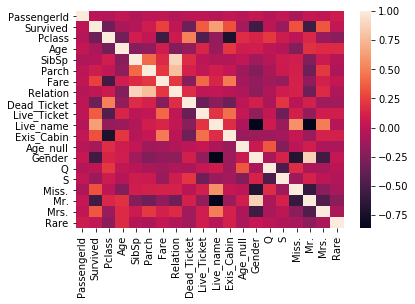

In [311]:
sns.heatmap(df_train_fill.corr())

In [312]:
df_train_fill.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Relation,Dead_Ticket,Live_Ticket,Live_name,Exis_Cabin,Age_null,Gender,Q,S,Miss.,Mr.,Mrs.,Rare
PassengerId,1.000000,-0.005007,-0.035144,0.031449,-0.057527,-0.001652,0.012658,-0.040143,0.003973,0.002798,-0.032975,0.019919,-0.020167,0.042939,-0.033606,0.022204,-0.073110,0.038850,0.011245,0.068907
Survived,-0.005007,1.000000,-0.338481,-0.077105,-0.035322,0.081629,0.257307,0.016639,-0.338077,0.363581,0.631827,0.316912,-0.092197,-0.543351,0.003650,-0.149683,0.327093,-0.549199,0.339040,0.022030
Pclass,-0.035144,-0.338481,1.000000,-0.316108,0.083081,0.018443,-0.549500,0.065997,0.511925,-0.466076,-0.168750,-0.725541,0.172933,0.131900,0.221009,0.074053,-0.000576,0.142698,-0.149209,-0.206333
Age,0.031449,-0.077105,-0.316108,1.000000,-0.230299,-0.188728,0.083035,-0.251687,-0.174224,0.137223,-0.147323,0.220574,0.081674,0.088382,0.013749,-0.038994,-0.247136,0.192865,0.160762,0.159775
SibSp,-0.057527,-0.035322,0.083081,-0.230299,1.000000,0.414838,0.159651,0.890712,0.167054,0.002133,-0.041856,-0.040460,0.018958,-0.114631,-0.026354,0.068734,0.087932,-0.250489,0.063407,-0.036364
Parch,-0.001652,0.081629,0.018443,-0.188728,0.414838,1.000000,0.216225,0.783111,0.113348,0.020998,0.095215,0.036987,-0.124104,-0.245489,-0.081228,0.060814,0.105567,-0.333905,0.225852,-0.067480
Fare,0.012658,0.257307,-0.549500,0.083035,0.159651,0.216225,1.000000,0.217138,-0.235849,0.409140,0.140120,0.482075,-0.100707,-0.182333,-0.117216,-0.162184,0.118271,-0.183766,0.105203,0.024585
Relation,-0.040143,0.016639,0.065997,-0.251687,0.890712,0.783111,0.217138,1.000000,0.170802,0.011948,0.018961,-0.009175,-0.049043,-0.200988,-0.058592,0.077359,0.112838,-0.338014,0.156168,-0.058565
Dead_Ticket,0.003973,-0.338077,0.511925,-0.174224,0.167054,0.113348,-0.235849,0.170802,1.000000,-0.354940,-0.208890,-0.340903,-0.002682,0.101321,-0.080454,0.207883,-0.005744,0.108552,-0.117829,-0.116253
Live_Ticket,0.002798,0.363581,-0.466076,0.137223,0.002133,0.020998,0.409140,0.011948,-0.354940,1.000000,0.202051,0.434452,0.034126,-0.175174,0.044243,-0.335158,0.099524,-0.166654,0.083515,0.092563


#### 相関係数を見て手動で削るのはあまり効率よく無さそう

## とりあえずLasso回帰をやってみて結果を見てみよう

In [313]:
estimator = LassoCV(normalize=True, cv=10)
sfm_fill = SelectFromModel(estimator, threshold=1e-5)
sfm_fill.fit(X_train1_fill, y_train1)

SelectFromModel(estimator=LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001,
                                  fit_intercept=True, max_iter=1000,
                                  n_alphas=100, n_jobs=None, normalize=True,
                                  positive=False, precompute='auto',
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, verbose=False),
                max_features=None, norm_order=1, prefit=False, threshold=1e-05)

In [314]:
X_train1_fill_selected = sfm_fill.transform(X_train1_fill)
X_test1_fill_selected = sfm_fill.transform(X_test1_fill)

In [315]:
sfm_fill.get_support()

array([ True,  True,  True, False,  True,  True,  True,  True, False,
        True, False, False,  True,  True, False])

In [316]:
X_train1_fill.head(1)

,Pclass,Age,Fare,Relation,Dead_Ticket,Live_Ticket,Live_name,Exis_Cabin,Gender,Q,S,Miss.,Mr.,Mrs.,Rare
0,3,22.0,-0.502445,1,1,0,0,0,1,0,1,0,1,0,0


削除された特徴量
__`Relation, Gender, S, Miss., Rare`__

Live_nameはHonorificsとRelationを絡めて作った特徴量なのでそれらが消えたっぽい？

---

### ランダムフォレスト（Age欠損埋め・特徴量選択）

In [317]:
rf_fill_sel = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
rf_fill_sel.fit(X_train1_fill_selected, y_train1)
rf_fill_sel_pred = rf_fill_sel.predict(X_test1_fill_selected)

In [318]:
output_rf_fill_sel = pd.DataFrame({'PassengerId': df_test1['PassengerId'], 'Survived': rf_fill_sel_pred})
#output_rf_fill_sel.to_csv('my_submission_rf_fill_sel.csv', index=False)

### Score=0.78468

---

### ロジスティック回帰（Age欠損埋め・特徴量選択）

In [319]:
lr_fill_sel = LogisticRegression()
lr_fill_sel.fit(X_train1_fill_selected, y_train1)
lr_fill_sel_pred = lr_fill_sel.predict(X_test1_fill_selected)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [320]:
output_lr_fill_selected = pd.DataFrame({'PassengerId': df_test1['PassengerId'], 'Survived': lr_fill_sel_pred})
#output_lr_fill_selected.to_csv('my_submission_lr_fill_sel.csv', index=False)

### Score=0.76315

---

### SVM（Age欠損埋め・特徴量選択）

In [321]:
svm_fill_sel = SVC(kernel='linear', C=0.1, gamma=1.0)
svm_fill_sel.fit(X_train1_fill_selected, y_train1)
svm_fill_sel_pred = svm_fill_sel.predict(X_test1_fill_selected)

In [322]:
output_svm_fill_sel = pd.DataFrame({'PassengerId': df_test1['PassengerId'], 'Survived': svm_fill_sel_pred})
#output_svm_fill_sel.to_csv('my_submission_svm_fill_sel.csv', index=False)

### Score = 0.76794

--- 

## 現時点でのScore

1. __rf_fill_sel__ 0.78468
2. __rf__と__rf_fill__ 0.77990
4. __svm__と__lr__ 0.77751
6. __rf_sel__と__lr_sel__ 0.77033
8. __svm_sel__と__svm_fill__と__svm_fill_sel__と__lr_fill__ 0.76794
12. __lr_fill_sel__ 0.76315

- __rf__と__sel__, __rf__と__fill__の組み合わせはとてもマッチしている？
- __svm__と__lr__は__fill__も__sel__もしないほうが調子が良い
- ただ、１位と６位とのスコアの差は、たったの0.02153（2.153%）なので誤差の可能性？これは十分な差？

---

## rf_fill_selをパラメータチューニングしてみる

In [323]:
#max_depth=8にしてみる
rf_fill_sel_tuned8 = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=0)
rf_fill_sel_tuned8.fit(X_train1_fill_selected, y_train1)
rf_fill_sel_tuned8_pred = rf_fill_sel_tuned8.predict(X_test1_fill_selected)

output_rf_fill_sel_tuned8 = pd.DataFrame({'PassengerId': df_test1['PassengerId'], 'Survived': rf_fill_sel_tuned8_pred})
#output_rf_fill_sel_tuned8.to_csv('my_submission_rf_fill_sel_tuned8.csv', index=False)

## `max_depth=8` Score=0.77272 （-0.01196）だいぶ悪くなった

In [324]:
#max_depth=3にしてみる
rf_fill_sel_tuned3 = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0)
rf_fill_sel_tuned3.fit(X_train1_fill_selected, y_train1)
rf_fill_sel_tuned3_pred = rf_fill_sel_tuned3.predict(X_test1_fill_selected)

output_rf_fill_sel_tuned3 = pd.DataFrame({'PassengerId': df_test1['PassengerId'], 'Survived': rf_fill_sel_tuned3_pred})
#output_rf_fill_sel_tuned3.to_csv('my_submission_rf_fill_sel_tuned3.csv', index=False)

## `max_depth=3`Score=0.77272　（同じく悪化）

In [325]:
#max_depth=6にしてみる
rf_fill_sel_tuned6 = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=0)
rf_fill_sel_tuned6.fit(X_train1_fill_selected, y_train1)
rf_fill_sel_tuned6_pred = rf_fill_sel_tuned6.predict(X_test1_fill_selected)

output_rf_fill_sel_tuned6 = pd.DataFrame({'PassengerId': df_test1['PassengerId'], 'Survived': rf_fill_sel_tuned6_pred})
#output_rf_fill_sel_tuned6.to_csv('my_submission_rf_fill_sel_tuned6.csv', index=False)

## `max_depth=6` Score=0.78229 (-0.00239)　（ほんの少し悪化）

In [326]:
#max_depth=4にしてみる
rf_fill_sel_tuned4 = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=0)
rf_fill_sel_tuned4.fit(X_train1_fill_selected, y_train1)
rf_fill_sel_tuned4_pred = rf_fill_sel_tuned4.predict(X_test1_fill_selected)

output_rf_fill_sel_tuned4 = pd.DataFrame({'PassengerId': df_test1['PassengerId'], 'Survived': rf_fill_sel_tuned4_pred})
#output_rf_fill_sel_tuned4.to_csv('my_submission_rf_fill_sel_tuned4.csv', index=False)

## `max_depth=4` Score=0.78947 (+0.00579)　（ほんの少し改善）

## `max_depth`ごとのScore
1. max_depth=4
2. max_depth=5
3. max_depth=6
4. max_depth=3, 8

for文使えば一瞬だった？

---

# クロスバリデーションも交えてみる

1. max_depth=4でクロスバリデーション
2. そこから再度パラメーターチューニング

[クロスバリデーションとグリッドサーチ(備忘録)](https://qiita.com/Takayoshi_Makabe/items/d35eed0c3064b495a08b)

すっごいわかりやすい
クロスバリデーションとグリッドサーチを同時に行って簡単に最良のパラメーターを求められる


とりあえずクロスバリデーションやってみよう

In [327]:
from sklearn.model_selection import cross_val_score
cross_val_score(rf_fill_sel_tuned4, X_train1_fill_selected, y_train1, cv=5)

array([0.8547486 , 0.83707865, 0.86516854, 0.81460674, 0.88764045])

案外バラバラ

Max: 0.8876

Min: 0.8146

ここからどうする。？

---

# とりあえず今（2020年8月15日）のtitanicのスコアは0.78947
## 2892位/20834個 (上位13.88%)ランダムフォレスト(Max_depth=4)

### いったんここでひと段落。LightBGMとXGBoostもやってみたらもうちょいスコア伸びる？検証要